In [1]:
#### Reference paper https://arxiv.org/abs/1808.08219

#### Keeping tau_i fixed and then calculating y_i as per the value of 
#### tau_i.


import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
from adaptive_integrator import integrate
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})


# Reference paper https://arxiv.org/abs/1808.08219
# Referencing from Eq.(3.2) to Eq.(3.7) in https://arxiv.org/abs/1808.08219
# Only using the dimensionless equations
# Using PBH as the sole source og Gravitational potential
# Explicitly adding Hubble expansion (or deceleration term) in RD with H(t)=1/2t
# so that v_i = H r_i .
# Using either solve_ivp or adaptive integrator as the differential equation solver


π = np.pi
Ω_cdm = 0.85
G = 6.67e-11                # in units of m^3⋅kg^−1⋅s^−2
t_i = 2.358e5                # in units of seconds
t_eq = 1.5923e12            # in units of seconds
ρ_eq = 2.1548e-16          # in units of kg m^-3
M_solar = 1.989e30        # in units of kg
c = 3e8                 #in units of m/s
A = 1.495e11                 # Astronomical unit
pc = 3.085e16               # in unist of meter. 
yr = 3.154e7              # in units of seconds
a_eq = 2.9374e-4

hbar = 1.0545718e-34        # reduced Planck constant in unkits of J.s
eV = 1.60218e-19               #in units of J
eV_to_kg = 1.7826e-36             #in units of kg
m_FDM_eV = 1e-22     #in units of eV/c²
m_FDM = m_FDM_eV * eV_to_kg      # Mass of FDM boson in units of kg



def j_fdm_hubble(t, y):
    r, dydtau = y
    dydtau2 =  - r/(4 * (t**2))
    return [dydtau, dydtau2]


def j_fdm(t, y):   #j_fdm_full(t, y)
    r, dydtau = y
    dydtau2 = (2*gamma - (gamma**2))/(4*(r**3)) - 1/(r**2) - r/(4 * (t**2))
    return [dydtau, dydtau2]
 



def j_cdm(t, y):
    r, dydtau = y
    dydtau2 =  - 1/(r**2) - r/(4 * (t**2))
    return [dydtau, dydtau2]


# Event function for maximum (dy/dtau = 0)
def event_y_max(t, y):
    return y[1]  # Detect when velocity (dy/dtau) is zero
event_y_max.terminal = False  # Do not stop integration here
event_y_max.direction = -1    # Detect decreasing slope (peak reached)
# Event function for minimum (dy/dtau = 0 after y_max)
def event_y_min(t, y):
    return y[1]  # Detect when velocity (dy/dtau) is zero
event_y_min.terminal = True   # Stop integration here
event_y_min.direction = 1     # Detect increasing slope (trough reached)


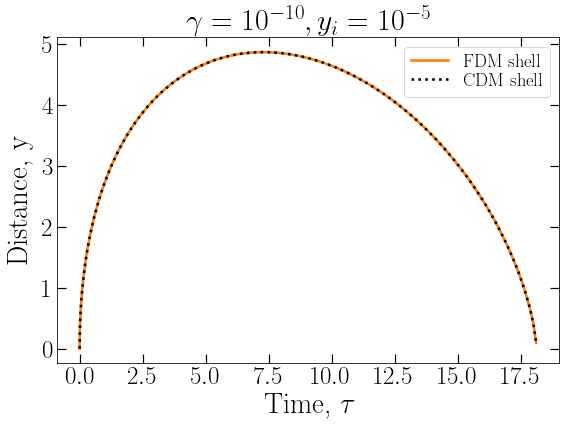

In [2]:
# Specifying initial conditions as per Fig.1 of https://arxiv.org/abs/1808.08219

y_i = 1e-5
tau_i = 1e-11
v_i = y_i/(2 * tau_i)


gamma = 1e-10
tau_f = 1e15



y0 = [y_i, v_i]
tau_arr = np.geomspace(tau_i, tau_f, 10000)
sol_fdm = solve_ivp(j_fdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45', rtol=1e-8, atol=1e-10)
sol_cdm = solve_ivp(j_cdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45', rtol=1e-8, atol=1e-10)


#t_arr_adaptive, y_arr_adaptive, _ = integrate(d2ydtau2, y_i, v_i, tau_i, tau_f, eta=1e-8, dt_max=1e-2)


fig, ax = plt.subplots(1, figsize=(9, 6))
plt.rc('lines', linewidth = 2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')


plt.plot(sol_fdm.t, sol_fdm.y[0],  color = 'C1')
plt.plot(sol_cdm.t, sol_cdm.y[0],  color = 'k', ls = ':')
#plt.plot(t_arr_adaptive, y_arr_adaptive, label="",  color ='C2', ls = ':')
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel(r'Time, $\tau $', fontsize = 29)
plt.ylabel('Distance, y ', fontsize = 29, labelpad = 9)

plt.legend( ["FDM shell",'CDM shell'], prop = {'size':18.5},
              loc='upper right', shadow = False,  labelspacing = 0.13,  title_fontsize =19,
           facecolor = 'white')


plt.title(r'$\gamma = 10^{-10}, y_i = 10^{-5}$', fontsize = 30)
#plt.savefig('check.pdf', bbox_inches = 'tight')
plt.show()

In [3]:
#Checking the validity of the initial conditions (in particular
# the value of tau_i)

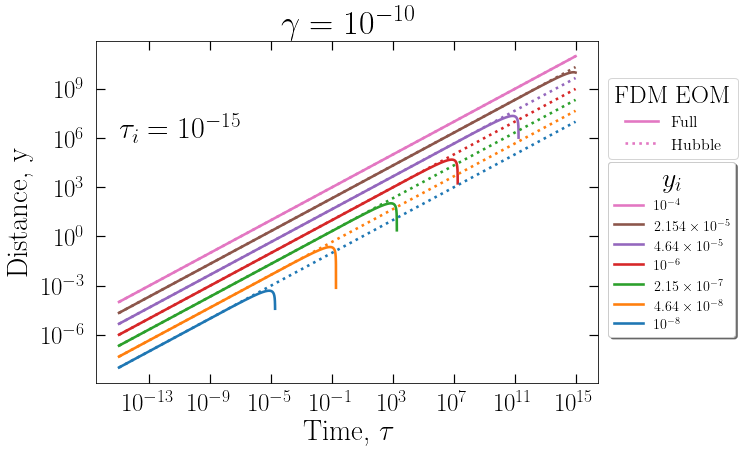

In [2]:
fig, ax = plt.subplots(1, figsize=(9, 6.3))
plt.rc('lines', linewidth=2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')




gamma = 1e-10
tau_f = 1e15
yi_arr = np.geomspace(1e-4, 1e-8, 7)



colors = ['C6','C5','C4', 'C3', 'C2', 'C1', 'C0'] 
for i, (y_i, color) in enumerate(zip(yi_arr, colors)):
    tau_i = 1e-15      
    v_i = y_i/(2 * tau_i) 
    y0 = [y_i, v_i]
    tau_arr = np.geomspace(tau_i, tau_f, 10000) 

    
    sol_fdm_full = solve_ivp(j_fdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    sol_fdm_hubble = solve_ivp(j_fdm_hubble, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    
    ax.loglog(sol_fdm_full.t, sol_fdm_full.y[0], color = color)
    ax.loglog(sol_fdm_hubble.t, sol_fdm_hubble.y[0],  color = color, ls =':')

    
 
    
ax.tick_params(axis ='x', pad = 9.9)
ax.tick_params(axis ='y', pad = 9.9)
lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["Full", "Hubble"], title = 'FDM EOM',
        title_fontsize = 25, loc = (1.02, 0.655), prop = {"size":16.3})
legend2 = plt.legend([lines[i] for i in [0, 2, 4, 6, 8, 10, 12]], [  
              r'$10^{-4}$', r'$ 2.154\times10^{-5}$', r'$4.64\times10^{-5}$', r'$10^{-6}$',r'$2.15\times10^{-7}$',
                r'$4.64\times10^{-8}$',  r'$10^{-8}$'                                                  
              ],prop = {'size':14.2},
              loc = (1.02, 0.135),shadow = True, title = '$y_{i}$' ,title_fontsize = 28,
           facecolor = 'white',fontsize = 28)


ax.add_artist(legend1)
ax.add_artist(legend2)

plt.text(1e-15, 1e6, r'$\tau_i = 10^{-15}$', fontsize = 30)



plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau$', fontsize=29)
plt.ylabel('Distance, y', fontsize=29, labelpad=9)
plt.title(r'$\gamma = 10^{-10}$', fontsize = 34)
plt.savefig('initial_condition1.pdf', bbox_inches = 'tight')
plt.show()

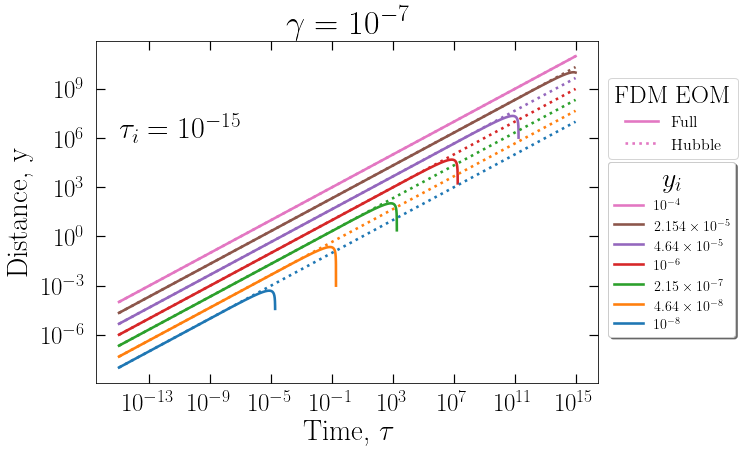

In [3]:
fig, ax = plt.subplots(1, figsize=(9, 6.3))
plt.rc('lines', linewidth=2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')




gamma = 1e-7
tau_f = 1e15
yi_arr = np.geomspace(1e-4, 1e-8, 7)



colors = ['C6','C5','C4', 'C3', 'C2', 'C1', 'C0'] 
for i, (y_i, color) in enumerate(zip(yi_arr, colors)):
    tau_i = 1e-15     
    v_i = y_i/(2 * tau_i) 
    y0 = [y_i, v_i]
    tau_arr = np.geomspace(tau_i, tau_f, 10000) 

    
    sol_fdm_full = solve_ivp(j_fdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    sol_fdm_hubble = solve_ivp(j_fdm_hubble, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    
    ax.loglog(sol_fdm_full.t, sol_fdm_full.y[0], color = color)
    ax.loglog(sol_fdm_hubble.t, sol_fdm_hubble.y[0],  color = color, ls =':')

    
 
    
ax.tick_params(axis ='x', pad = 9.9)
ax.tick_params(axis ='y', pad = 9.9)
lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["Full", "Hubble"], title = 'FDM EOM',
        title_fontsize = 25, loc = (1.02, 0.655), prop = {"size":16.3})
legend2 = plt.legend([lines[i] for i in [0, 2, 4, 6, 8, 10, 12]], [  
              r'$10^{-4}$', r'$ 2.154\times10^{-5}$', r'$4.64\times10^{-5}$', r'$10^{-6}$',r'$2.15\times10^{-7}$',
                r'$4.64\times10^{-8}$',  r'$10^{-8}$'                                                  
              ],prop = {'size':14.2},
              loc = (1.02, 0.135),shadow = True, title = '$y_{i}$' ,title_fontsize = 28,
           facecolor = 'white',fontsize = 28)


ax.add_artist(legend1)
ax.add_artist(legend2)

plt.text(1e-15, 1e6, r'$\tau_i = 10^{-15}$', fontsize = 30)



plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau$', fontsize=29)
plt.ylabel('Distance, y', fontsize=29, labelpad=9)
plt.title(r'$\gamma = 10^{-7}$', fontsize = 34)
plt.savefig('initial_condition2.pdf', bbox_inches = 'tight')
plt.show()

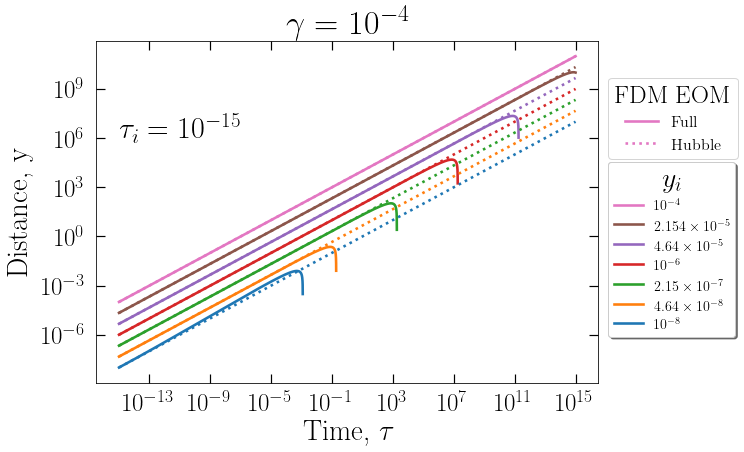

In [4]:
fig, ax = plt.subplots(1, figsize=(9, 6.3))
plt.rc('lines', linewidth=2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')




gamma = 1e-4
tau_f = 1e15
yi_arr = np.geomspace(1e-4, 1e-8, 7)



colors = ['C6','C5','C4', 'C3', 'C2', 'C1', 'C0'] 
for i, (y_i, color) in enumerate(zip(yi_arr, colors)):
    tau_i = 1e-15      
    v_i = y_i/(2 * tau_i) 
    y0 = [y_i, v_i]
    tau_arr = np.geomspace(tau_i, tau_f, 10000) 

    
    sol_fdm_full = solve_ivp(j_fdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    sol_fdm_hubble = solve_ivp(j_fdm_hubble, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    
    ax.loglog(sol_fdm_full.t, sol_fdm_full.y[0], color = color)
    ax.loglog(sol_fdm_hubble.t, sol_fdm_hubble.y[0],  color = color, ls =':')

    
 
    
ax.tick_params(axis ='x', pad = 9.9)
ax.tick_params(axis ='y', pad = 9.9)
lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["Full", "Hubble"], title = 'FDM EOM',
        title_fontsize = 25, loc = (1.02, 0.655), prop = {"size":16.3})
legend2 = plt.legend([lines[i] for i in [0, 2, 4, 6, 8, 10, 12]], [  
              r'$10^{-4}$', r'$ 2.154\times10^{-5}$', r'$4.64\times10^{-5}$', r'$10^{-6}$',r'$2.15\times10^{-7}$',
                r'$4.64\times10^{-8}$',  r'$10^{-8}$'                                                  
              ],prop = {'size':14.2},
              loc = (1.02, 0.135),shadow = True, title = '$y_{i}$' ,title_fontsize = 28,
           facecolor = 'white',fontsize = 28)


ax.add_artist(legend1)
ax.add_artist(legend2)

plt.text(1e-15, 1e6, r'$\tau_i = 10^{-15}$', fontsize = 30)



plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau$', fontsize=29)
plt.ylabel('Distance, y', fontsize=29, labelpad=9)
plt.title(r'$\gamma = 10^{-4}$', fontsize = 34)
plt.savefig('initial_condition3.pdf', bbox_inches = 'tight')
plt.show()

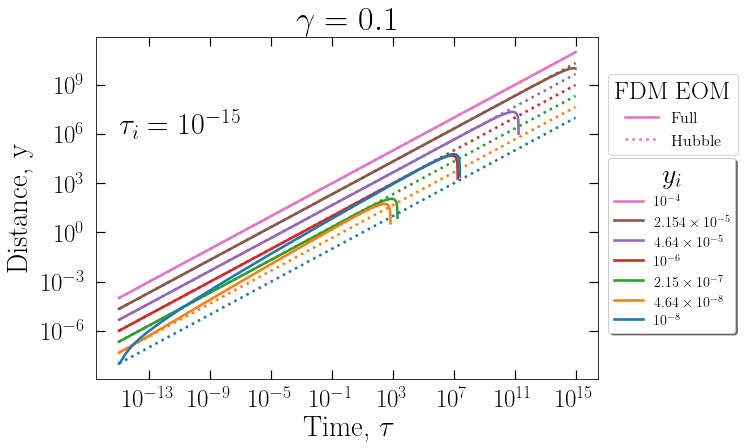

In [5]:
fig, ax = plt.subplots(1, figsize=(9, 6.3))
plt.rc('lines', linewidth=2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')




gamma = 0.1
tau_f = 1e15
yi_arr = np.geomspace(1e-4, 1e-8, 7)



colors = ['C6','C5','C4', 'C3', 'C2', 'C1', 'C0'] 
for i, (y_i, color) in enumerate(zip(yi_arr, colors)):
    tau_i = 1e-15      
    v_i = y_i/(2 * tau_i) 
    y0 = [y_i, v_i]
    tau_arr = np.geomspace(tau_i, tau_f, 10000) 

    
    sol_fdm_full = solve_ivp(j_fdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    sol_fdm_hubble = solve_ivp(j_fdm_hubble, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    
    ax.loglog(sol_fdm_full.t, sol_fdm_full.y[0], color = color)
    ax.loglog(sol_fdm_hubble.t, sol_fdm_hubble.y[0],  color = color, ls =':')

    
 
    
ax.tick_params(axis ='x', pad = 9.9)
ax.tick_params(axis ='y', pad = 9.9)
lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["Full", "Hubble"], title = 'FDM EOM',
        title_fontsize = 25, loc = (1.02, 0.655), prop = {"size":16.3})
legend2 = plt.legend([lines[i] for i in [0, 2, 4, 6, 8, 10, 12]], [  
              r'$10^{-4}$', r'$ 2.154\times10^{-5}$', r'$4.64\times10^{-5}$', r'$10^{-6}$',r'$2.15\times10^{-7}$',
                r'$4.64\times10^{-8}$',  r'$10^{-8}$'                                                  
              ],prop = {'size':14.2},
              loc = (1.02, 0.135),shadow = True, title = '$y_{i}$' ,title_fontsize = 28,
           facecolor = 'white',fontsize = 28)


ax.add_artist(legend1)
ax.add_artist(legend2)

plt.text(1e-15, 1e6, r'$\tau_i = 10^{-15}$', fontsize = 30)



plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau$', fontsize=29)
plt.ylabel('Distance, y', fontsize=29, labelpad=9)
plt.title(r'$\gamma = 0.1$', fontsize = 34)
plt.savefig('initial_condition4.pdf', bbox_inches = 'tight')
plt.show()

In [8]:
# The above plots show that the choice of τi is correct 
# (i.e. the initial conditions are set properly), if for a given γ,
# all the FDM shells (with different yi in the selected range) are first 
# evolving under Hubble expansion and then turn around towards the PBH at 
# different τ > τ_i. But for any y_i , if the primary evolution 
# under Hubble expansion- part is cut-off then τi needs to
# be adjusted properly (more specifically in that case τ_i needs to be decreased).

In [9]:
## Dynamics of FDM shells for  various  values of gamma,
# keeping tau_i = 1e-15 as fixed.

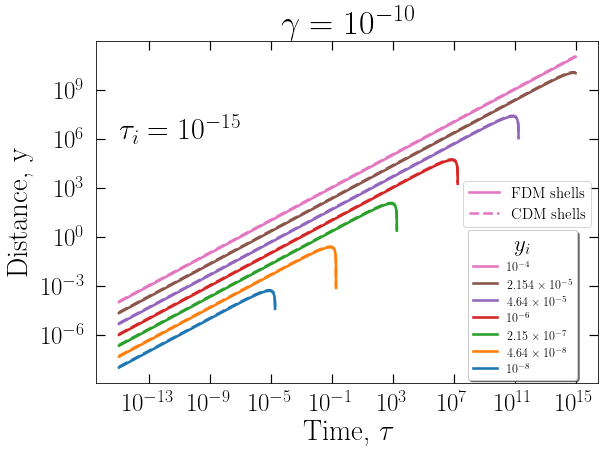

In [6]:
fig, ax = plt.subplots(1, figsize=(9, 6.3))
plt.rc('lines', linewidth=2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')




gamma = 1e-10
tau_f = 1e15
yi_arr = np.geomspace(1e-4, 1e-8, 7)





colors = ['C6','C5','C4', 'C3', 'C2', 'C1', 'C0'] 
for i, (y_i, color) in enumerate(zip(yi_arr, colors)):
    tau_i = 1e-15      
    v_i = y_i/(2 * tau_i) 
    y0 = [y_i, v_i]
    tau_arr = np.geomspace(tau_i, tau_f, 10000) 

    
    sol_fdm = solve_ivp(j_fdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    sol_cdm = solve_ivp(j_cdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    
    ax.loglog(sol_fdm.t, sol_fdm.y[0], color = color)
    ax.loglog(sol_cdm.t, sol_cdm.y[0]*1.1,  color = color, ls ='--')

    
 
    
ax.tick_params(axis ='x', pad = 9.9)
ax.tick_params(axis ='y', pad = 9.9)
lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["FDM shells", "CDM shells"], title = '',
        title_fontsize = 37, loc = (0.73, 0.455), prop = {"size":15})
legend2 = plt.legend([lines[i] for i in [0, 2, 4, 6, 8, 10, 12]], [  
              r'$10^{-4}$', r'$ 2.154\times10^{-5}$', r'$4.64\times10^{-5}$', r'$10^{-6}$',r'$2.15\times10^{-7}$',
                r'$4.64\times10^{-8}$',  r'$10^{-8}$'                                                  
              ],prop = {'size':12.2},
              loc = (0.74, 0.01),shadow = True, title = '$y_{i}$' ,title_fontsize = 23,
           facecolor = 'white',fontsize = 25)
    
ax.add_artist(legend1)
ax.add_artist(legend2)

plt.text(1e-15, 1e6, r'$\tau_i = 10^{-15}$', fontsize = 30)



plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau$', fontsize=29)
plt.ylabel('Distance, y', fontsize=29, labelpad=9)
plt.title(r'$\gamma = 10^{-10}$', fontsize = 34)
plt.savefig('Diff_shells1.pdf', bbox_inches = 'tight')
plt.show()

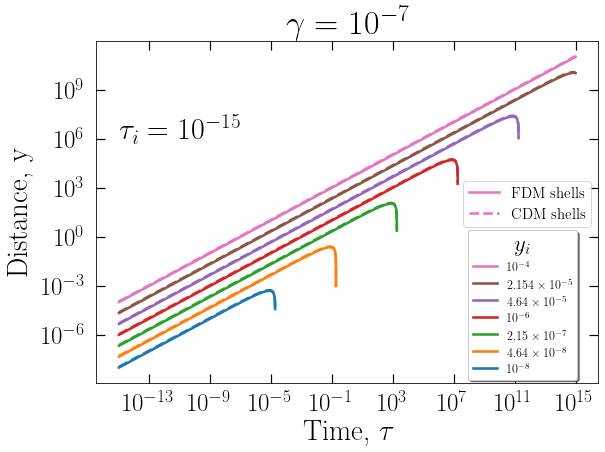

In [7]:
fig, ax = plt.subplots(1, figsize=(9, 6.3))
plt.rc('lines', linewidth=2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')




gamma = 1e-7
tau_f = 1e15
yi_arr = np.geomspace(1e-4, 1e-8, 7)


colors = ['C6','C5','C4', 'C3', 'C2', 'C1', 'C0'] 
for i, (y_i, color) in enumerate(zip(yi_arr, colors)):
    tau_i = 1e-15      
    v_i = y_i/(2 * tau_i) 
    y0 = [y_i, v_i]
    tau_arr = np.geomspace(tau_i, tau_f, 10000) 

    
    sol_fdm = solve_ivp(j_fdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    sol_cdm = solve_ivp(j_cdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    
    ax.loglog(sol_fdm.t, sol_fdm.y[0], color = color)
    ax.loglog(sol_cdm.t, sol_cdm.y[0]*1.1,  color = color, ls ='--')

    
 
    
ax.tick_params(axis ='x', pad = 9.9)
ax.tick_params(axis ='y', pad = 9.9)
lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["FDM shells", "CDM shells"], title = '',
        title_fontsize = 37, loc = (0.73, 0.455), prop = {"size":15})
legend2 = plt.legend([lines[i] for i in [0, 2, 4, 6, 8, 10, 12]], [  
              r'$10^{-4}$', r'$ 2.154\times10^{-5}$', r'$4.64\times10^{-5}$', r'$10^{-6}$',r'$2.15\times10^{-7}$',
                r'$4.64\times10^{-8}$',  r'$10^{-8}$'                                                  
              ],prop = {'size':12.2},
              loc = (0.74, 0.01),shadow = True, title = '$y_{i}$' ,title_fontsize = 23,
           facecolor = 'white',fontsize = 25)
    
ax.add_artist(legend1)
ax.add_artist(legend2)

plt.text(1e-15, 1e6, r'$\tau_i = 10^{-15}$', fontsize = 30)



plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau$', fontsize=29)
plt.ylabel('Distance, y', fontsize=29, labelpad=9)
plt.title(r'$\gamma = 10^{-7}$', fontsize = 34)
plt.savefig('Diff_shells2.pdf', bbox_inches = 'tight')
plt.show()

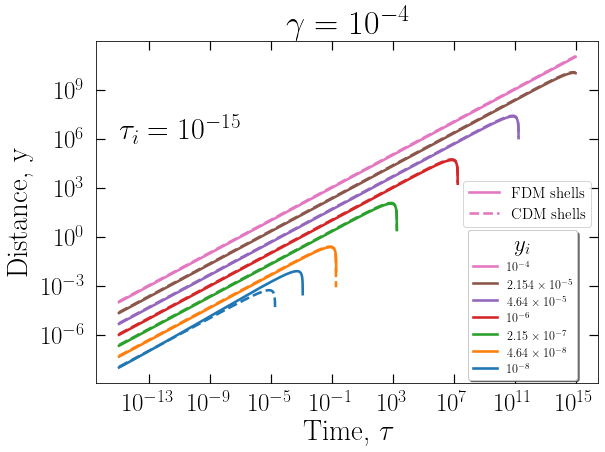

In [8]:
fig, ax = plt.subplots(1, figsize=(9, 6.3))
plt.rc('lines', linewidth=2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')




gamma = 1e-4
tau_f = 1e15
yi_arr = np.geomspace(1e-4, 1e-8, 7)


colors = ['C6','C5','C4', 'C3', 'C2', 'C1', 'C0'] 
for i, (y_i, color) in enumerate(zip(yi_arr, colors)):
    tau_i = 1e-15      
    v_i = y_i/(2 * tau_i) 
    y0 = [y_i, v_i]
    tau_arr = np.geomspace(tau_i, tau_f, 10000) 

    
    sol_fdm = solve_ivp(j_fdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    sol_cdm = solve_ivp(j_cdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    
    ax.loglog(sol_fdm.t, sol_fdm.y[0], color = color)
    ax.loglog(sol_cdm.t, sol_cdm.y[0]*1.1,  color = color, ls ='--')

    
 
    
ax.tick_params(axis ='x', pad = 9.9)
ax.tick_params(axis ='y', pad = 9.9)
lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["FDM shells", "CDM shells"], title = '',
        title_fontsize = 37, loc = (0.73, 0.455), prop = {"size":15})
legend2 = plt.legend([lines[i] for i in [0, 2, 4, 6, 8, 10, 12]], [  
              r'$10^{-4}$', r'$ 2.154\times10^{-5}$', r'$4.64\times10^{-5}$', r'$10^{-6}$',r'$2.15\times10^{-7}$',
                r'$4.64\times10^{-8}$',  r'$10^{-8}$'                                                  
              ],prop = {'size':12.2},
              loc = (0.74, 0.01),shadow = True, title = '$y_{i}$' ,title_fontsize = 23,
           facecolor = 'white',fontsize = 25)
    
ax.add_artist(legend1)
ax.add_artist(legend2)

plt.text(1e-15, 1e6, r'$\tau_i = 10^{-15}$', fontsize = 30)



plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau$', fontsize=29)
plt.ylabel('Distance, y', fontsize=29, labelpad=9)
plt.title(r'$\gamma = 10^{-4}$', fontsize = 34)
plt.savefig('Diff_shells3.pdf', bbox_inches = 'tight')
plt.show()

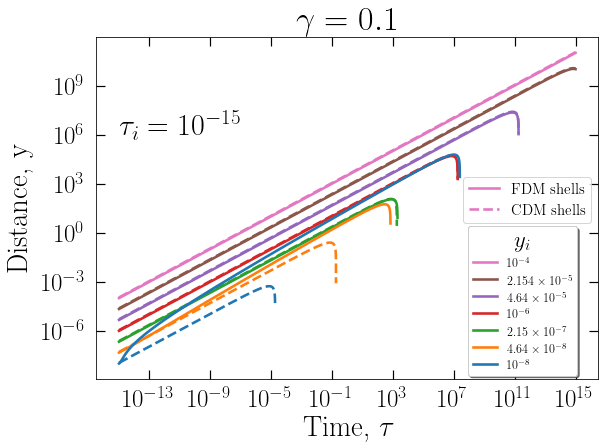

In [13]:
fig, ax = plt.subplots(1, figsize=(9, 6.3))
plt.rc('lines', linewidth=2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')




gamma = 0.1
tau_f = 1e15
yi_arr = np.geomspace(1e-4, 1e-8, 7)


colors = ['C6','C5','C4', 'C3', 'C2', 'C1', 'C0'] 
for i, (y_i, color) in enumerate(zip(yi_arr, colors)):
    tau_i = 1e-15      
    v_i = y_i/(2 * tau_i) 
    y0 = [y_i, v_i]
    tau_arr = np.geomspace(tau_i, tau_f, 10000) 

    
    sol_fdm = solve_ivp(j_fdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    sol_cdm = solve_ivp(j_cdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    
    ax.loglog(sol_fdm.t, sol_fdm.y[0], color = color)
    ax.loglog(sol_cdm.t, sol_cdm.y[0]*1.1,  color = color, ls ='--')

    
 
    
ax.tick_params(axis ='x', pad = 9.9)
ax.tick_params(axis ='y', pad = 9.9)
lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["FDM shells", "CDM shells"], title = '',
        title_fontsize = 37, loc = (0.73, 0.455), prop = {"size":15})
legend2 = plt.legend([lines[i] for i in [0, 2, 4, 6, 8, 10, 12]], [  
              r'$10^{-4}$', r'$ 2.154\times10^{-5}$', r'$4.64\times10^{-5}$', r'$10^{-6}$',r'$2.15\times10^{-7}$',
                r'$4.64\times10^{-8}$',  r'$10^{-8}$'                                                  
              ],prop = {'size':12.2},
              loc = (0.74, 0.01),shadow = True, title = '$y_{i}$' ,title_fontsize = 23,
           facecolor = 'white',fontsize = 25)
    
ax.add_artist(legend1)
ax.add_artist(legend2)

plt.text(1e-15, 1e6, r'$\tau_i = 10^{-15}$', fontsize = 30)



plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau$', fontsize=29)
plt.ylabel('Distance, y', fontsize=29, labelpad=9)
plt.title(r'$\gamma = 0.1 $', fontsize = 34)
plt.savefig('Diff_shells4.pdf', bbox_inches = 'tight')
plt.show()

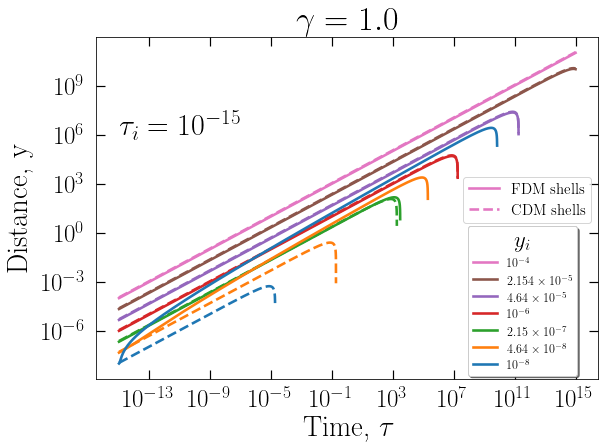

In [9]:
fig, ax = plt.subplots(1, figsize=(9, 6.3))
plt.rc('lines', linewidth=2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')




gamma = 1
tau_f = 1e15
yi_arr = np.geomspace(1e-4, 1e-8, 7)


colors = ['C6','C5','C4', 'C3', 'C2', 'C1', 'C0'] 
for i, (y_i, color) in enumerate(zip(yi_arr, colors)):
    tau_i = 1e-15      
    v_i = y_i/(2 * tau_i) 
    y0 = [y_i, v_i]
    tau_arr = np.geomspace(tau_i, tau_f, 10000) 

    
    sol_fdm = solve_ivp(j_fdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    sol_cdm = solve_ivp(j_cdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    
    ax.loglog(sol_fdm.t, sol_fdm.y[0], color = color)
    ax.loglog(sol_cdm.t, sol_cdm.y[0]*1.1,  color = color, ls ='--')

    
 
    
ax.tick_params(axis ='x', pad = 9.9)
ax.tick_params(axis ='y', pad = 9.9)
lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["FDM shells", "CDM shells"], title = '',
        title_fontsize = 37, loc = (0.73, 0.455), prop = {"size":15})
legend2 = plt.legend([lines[i] for i in [0, 2, 4, 6, 8, 10, 12]], [  
              r'$10^{-4}$', r'$ 2.154\times10^{-5}$', r'$4.64\times10^{-5}$', r'$10^{-6}$',r'$2.15\times10^{-7}$',
                r'$4.64\times10^{-8}$',  r'$10^{-8}$'                                                  
              ],prop = {'size':12.2},
              loc = (0.74, 0.01),shadow = True, title = '$y_{i}$' ,title_fontsize = 23,
           facecolor = 'white',fontsize = 25)
    
ax.add_artist(legend1)
ax.add_artist(legend2)

plt.text(1e-15, 1e6, r'$\tau_i = 10^{-15}$', fontsize = 30)



plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau$', fontsize=29)
plt.ylabel('Distance, y', fontsize=29, labelpad=9)
plt.title(r'$\gamma = 1.0 $', fontsize = 34)
plt.savefig('Diff_shells5.pdf', bbox_inches = 'tight')
plt.show()

In [15]:
## Dynamics of FDM shells for  various  values of gamma,
# keeping tau_i = 1e-11 as fixed.

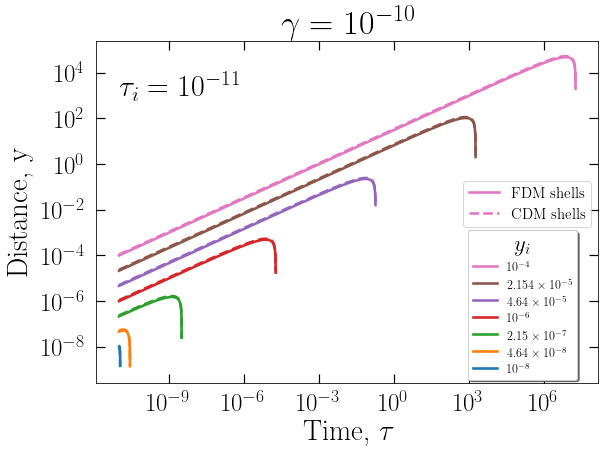

In [10]:
fig, ax = plt.subplots(1, figsize=(9, 6.3))
plt.rc('lines', linewidth=2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')




gamma = 1e-10
tau_f = 1e15
yi_arr = np.geomspace(1e-4, 1e-8, 7)


colors = ['C6','C5','C4', 'C3', 'C2', 'C1', 'C0'] 
for i, (y_i, color) in enumerate(zip(yi_arr, colors)):
    tau_i = 1e-11      
    v_i = y_i/(2 * tau_i) 
    y0 = [y_i, v_i]
    tau_arr = np.geomspace(tau_i, tau_f, 10000) 

    
    sol_fdm = solve_ivp(j_fdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    sol_cdm = solve_ivp(j_cdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    
    ax.loglog(sol_fdm.t, sol_fdm.y[0], color = color)
    ax.loglog(sol_cdm.t, sol_cdm.y[0]*1.1,  color = color, ls ='--')

    
 
    
ax.tick_params(axis ='x', pad = 9.9)
ax.tick_params(axis ='y', pad = 9.9)
lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["FDM shells", "CDM shells"], title = '',
        title_fontsize = 37, loc = (0.73, 0.455), prop = {"size":15})
legend2 = plt.legend([lines[i] for i in [0, 2, 4, 6, 8, 10, 12]], [  
              r'$10^{-4}$', r'$ 2.154\times10^{-5}$', r'$4.64\times10^{-5}$', r'$10^{-6}$',r'$2.15\times10^{-7}$',
                r'$4.64\times10^{-8}$',  r'$10^{-8}$'                                                  
              ],prop = {'size':12.2},
              loc = (0.74, 0.01),shadow = True, title = '$y_{i}$' ,title_fontsize = 23,
           facecolor = 'white',fontsize = 25)
    
ax.add_artist(legend1)
ax.add_artist(legend2)

plt.text(1e-11, 1000, r'$\tau_i = 10^{-11}$', fontsize = 30)



plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau$', fontsize=29)
plt.ylabel('Distance, y', fontsize=29, labelpad=9)
plt.title(r'$\gamma = 10^{-10}$', fontsize = 34)
plt.savefig('Diff_shells6.pdf', bbox_inches = 'tight')
plt.show()

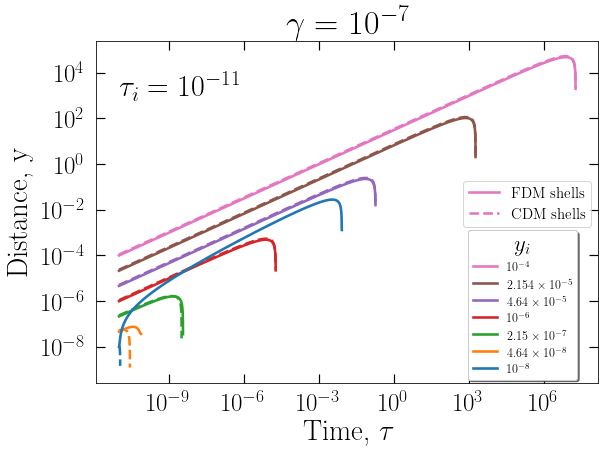

In [11]:
fig, ax = plt.subplots(1, figsize=(9, 6.3))
plt.rc('lines', linewidth=2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')




gamma = 1e-7
tau_f = 1e15
yi_arr = np.geomspace(1e-4, 1e-8, 7)


colors = ['C6','C5','C4', 'C3', 'C2', 'C1', 'C0'] 
for i, (y_i, color) in enumerate(zip(yi_arr, colors)):
    tau_i = 1e-11      
    v_i = y_i/(2 * tau_i) 
    y0 = [y_i, v_i]
    tau_arr = np.geomspace(tau_i, tau_f, 10000) 

    
    sol_fdm = solve_ivp(j_fdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    sol_cdm = solve_ivp(j_cdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    
    ax.loglog(sol_fdm.t, sol_fdm.y[0], color = color)
    ax.loglog(sol_cdm.t, sol_cdm.y[0]*1.1,  color = color, ls ='--')

    
 
    
ax.tick_params(axis ='x', pad = 9.9)
ax.tick_params(axis ='y', pad = 9.9)
lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["FDM shells", "CDM shells"], title = '',
        title_fontsize = 37, loc = (0.73, 0.455), prop = {"size":15})
legend2 = plt.legend([lines[i] for i in [0, 2, 4, 6, 8, 10, 12]], [  
              r'$10^{-4}$', r'$ 2.154\times10^{-5}$', r'$4.64\times10^{-5}$', r'$10^{-6}$',r'$2.15\times10^{-7}$',
                r'$4.64\times10^{-8}$',  r'$10^{-8}$'                                                  
              ],prop = {'size':12.2},
              loc = (0.74, 0.01),shadow = True, title = '$y_{i}$' ,title_fontsize = 23,
           facecolor = 'white',fontsize = 25)
    
ax.add_artist(legend1)
ax.add_artist(legend2)

plt.text(1e-11, 1000, r'$\tau_i = 10^{-11}$', fontsize = 30)



plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau$', fontsize=29)
plt.ylabel('Distance, y', fontsize=29, labelpad=9)
plt.title(r'$\gamma = 10^{-7}$', fontsize = 34)
plt.savefig('Diff_shells7.pdf', bbox_inches = 'tight')
plt.show()

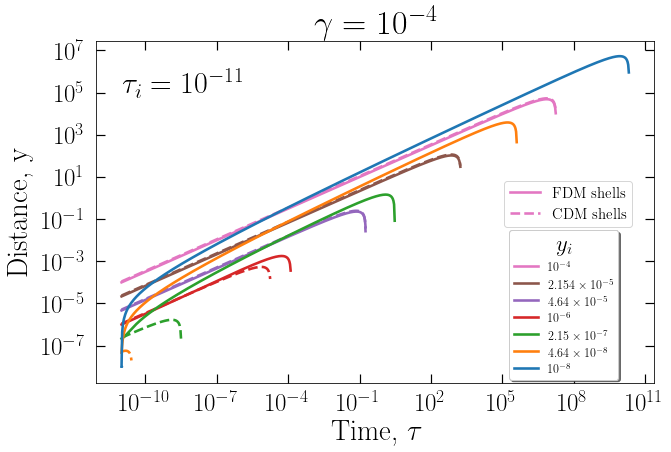

In [14]:
fig, ax = plt.subplots(1, figsize=(10, 6.3))
plt.rc('lines', linewidth=2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')




gamma = 1e-4
tau_f = 1e15
yi_arr = np.geomspace(1e-4, 1e-8, 7)


colors = ['C6','C5','C4', 'C3', 'C2', 'C1', 'C0'] 
for i, (y_i, color) in enumerate(zip(yi_arr, colors)):
    tau_i = 1e-11      
    v_i = (y_i/(2 * tau_i))
    y0 = [y_i, v_i]
    tau_arr = np.geomspace(tau_i, tau_f, 1000) 

    
    sol_fdm = solve_ivp(j_fdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min ])

    sol_cdm = solve_ivp(j_cdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8,  events=[event_y_max, event_y_min])

    #print("y_i =", y_i, "; y_FDM =", sol_fdm.y[0]), 
    ax.loglog(sol_fdm.t, sol_fdm.y[0], color = color)
    ax.loglog(sol_cdm.t, sol_cdm.y[0]*1.1,  color = color, ls ='--')

    
 
    
ax.tick_params(axis ='x', pad = 9.9)
ax.tick_params(axis ='y', pad = 9.9)
lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["FDM shells", "CDM shells"], title = '',
        title_fontsize = 37, loc = (0.73, 0.455), prop = {"size":15})
legend2 = plt.legend([lines[i] for i in [0, 2, 4, 6, 8, 10, 12]], [  
              r'$10^{-4}$', r'$ 2.154\times10^{-5}$', r'$4.64\times10^{-5}$', r'$10^{-6}$',r'$2.15\times10^{-7}$',
                r'$4.64\times10^{-8}$',  r'$10^{-8}$'                                                  
              ],prop = {'size':12.2},
              loc = (0.74, 0.01),shadow = True, title = '$y_{i}$' ,title_fontsize = 23,
           facecolor = 'white',fontsize = 25)


ax.add_artist(legend1)
ax.add_artist(legend2)

plt.text(1e-11, 1e5, r'$\tau_i = 10^{-11}$', fontsize = 30)



plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau$', fontsize=29)
plt.ylabel('Distance, y', fontsize=29, labelpad=9)
plt.title(r'$\gamma = 10^{-4}$', fontsize = 34)
plt.savefig('Diff_shells8.pdf', bbox_inches = 'tight')
plt.show()

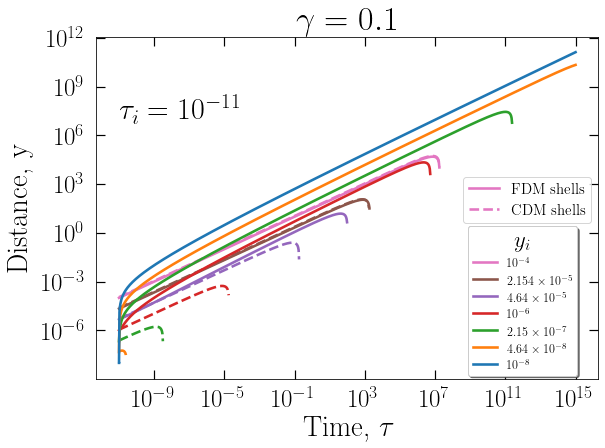

In [19]:
fig, ax = plt.subplots(1, figsize=(9, 6.3))
plt.rc('lines', linewidth=2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')




gamma = 0.1
tau_f = 1e15
yi_arr = np.geomspace(1e-4, 1e-8, 7)


colors = ['C6','C5','C4', 'C3', 'C2', 'C1', 'C0'] 
for i, (y_i, color) in enumerate(zip(yi_arr, colors)):
    tau_i = 1e-11      
    v_i = y_i/(2 * tau_i) 
    y0 = [y_i, v_i]
    tau_arr = np.geomspace(tau_i, tau_f, 1000) 

    
    sol_fdm = solve_ivp(j_fdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    sol_cdm = solve_ivp(j_cdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    
    ax.loglog(sol_fdm.t, sol_fdm.y[0], color = color)
    ax.loglog(sol_cdm.t, sol_cdm.y[0]*1.1,  color = color, ls ='--')

    
 
    
ax.tick_params(axis ='x', pad = 9.9)
ax.tick_params(axis ='y', pad = 9.9)
lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["FDM shells", "CDM shells"], title = '',
        title_fontsize = 37, loc = (0.73, 0.455), prop = {"size":15})
legend2 = plt.legend([lines[i] for i in [0, 2, 4, 6, 8, 10, 12]], [  
              r'$10^{-4}$', r'$ 2.154\times10^{-5}$', r'$4.64\times10^{-5}$', r'$10^{-6}$',r'$2.15\times10^{-7}$',
                r'$4.64\times10^{-8}$',  r'$10^{-8}$'                                                  
              ],prop = {'size':12.2},
              loc = (0.74, 0.01),shadow = True, title = '$y_{i}$' ,title_fontsize = 23,
           facecolor = 'white',fontsize = 25)
    
ax.add_artist(legend1)
ax.add_artist(legend2)

plt.text(1e-11, 1e7, r'$\tau_i = 10^{-11}$', fontsize = 30)


plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau$', fontsize=29)
plt.ylabel('Distance, y', fontsize=29, labelpad=9)
plt.title(r'$\gamma = 0.1$', fontsize = 34)
plt.savefig('Diff_shells9.pdf', bbox_inches = 'tight')
plt.show()

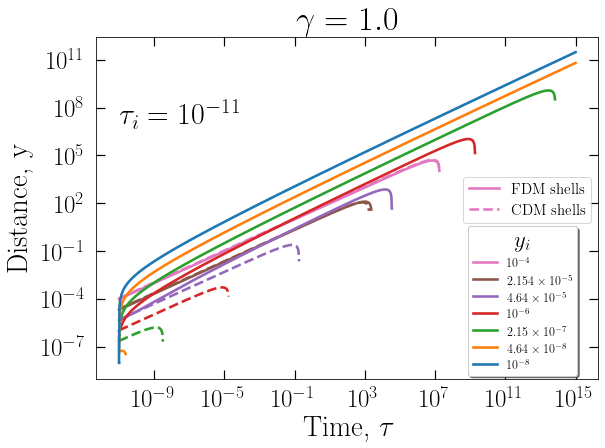

In [13]:
fig, ax = plt.subplots(1, figsize=(9, 6.3))
plt.rc('lines', linewidth=2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')




gamma = 1
tau_f = 1e15
yi_arr = np.geomspace(1e-4, 1e-8, 7)


colors = ['C6','C5','C4', 'C3', 'C2', 'C1', 'C0'] 
for i, (y_i, color) in enumerate(zip(yi_arr, colors)):
    tau_i = 1e-11      
    v_i = y_i/(2 * tau_i) 
    y0 = [y_i, v_i]
    tau_arr = np.geomspace(tau_i, tau_f, 1000) 

    
    sol_fdm = solve_ivp(j_fdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    sol_cdm = solve_ivp(j_cdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    
    ax.loglog(sol_fdm.t, sol_fdm.y[0], color = color)
    ax.loglog(sol_cdm.t, sol_cdm.y[0]*1.1,  color = color, ls ='--')

    
 
    
ax.tick_params(axis ='x', pad = 9.9)
ax.tick_params(axis ='y', pad = 9.9)
lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["FDM shells", "CDM shells"], title = '',
        title_fontsize = 37, loc = (0.73, 0.455), prop = {"size":15})
legend2 = plt.legend([lines[i] for i in [0, 2, 4, 6, 8, 10, 12]], [  
              r'$10^{-4}$', r'$ 2.154\times10^{-5}$', r'$4.64\times10^{-5}$', r'$10^{-6}$',r'$2.15\times10^{-7}$',
                r'$4.64\times10^{-8}$',  r'$10^{-8}$'                                                  
              ],prop = {'size':12.2},
              loc = (0.74, 0.01),shadow = True, title = '$y_{i}$' ,title_fontsize = 23,
           facecolor = 'white',fontsize = 25)
    
ax.add_artist(legend1)
ax.add_artist(legend2)

plt.text(1e-11, 1e7, r'$\tau_i = 10^{-11}$', fontsize = 30)


plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau$', fontsize=29)
plt.ylabel('Distance, y', fontsize=29, labelpad=9)
plt.title(r'$\gamma = 1.0$', fontsize = 34)
plt.savefig('Diff_shells10.pdf', bbox_inches = 'tight')
plt.show()

In [21]:
## Dynamics of FDM shells for  various  values of gamma,
# keeping tau_i = 1e-7 as fixed.

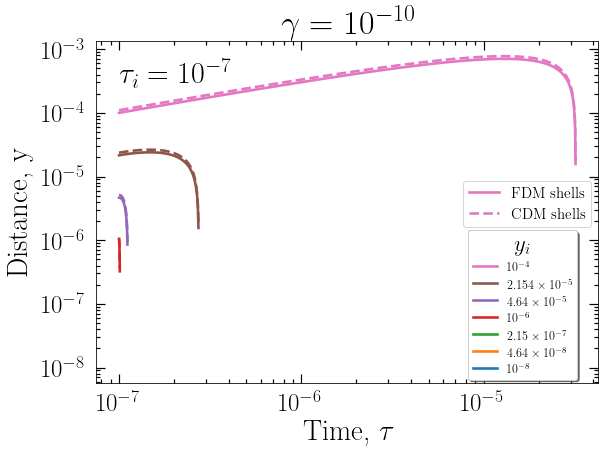

In [22]:
fig, ax = plt.subplots(1, figsize=(9, 6.3))
plt.rc('lines', linewidth=2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')




gamma = 1e-10
tau_f = 1e15
yi_arr = np.geomspace(1e-4, 1e-8, 7)

#array([1.00000000e-08, 4.64158883e-08, 2.15443469e-07, 1.00000000e-06,
      # 4.64158883e-06, 2.15443469e-05, 1.00000000e-04])

colors = ['C6','C5','C4', 'C3', 'C2', 'C1', 'C0'] 
for i, (y_i, color) in enumerate(zip(yi_arr, colors)):
    tau_i = 1e-7      
    v_i = y_i/(2 * tau_i) 
    y0 = [y_i, v_i]
    tau_arr = np.geomspace(tau_i, tau_f, 10000) 

    
    sol_fdm = solve_ivp(j_fdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    sol_cdm = solve_ivp(j_cdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    
    ax.loglog(sol_fdm.t, sol_fdm.y[0], color = color)
    ax.loglog(sol_cdm.t, sol_cdm.y[0]*1.1,  color = color, ls ='--')

    
 
    
ax.tick_params(axis ='x', pad = 9.9)
ax.tick_params(axis ='y', pad = 9.9)
lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["FDM shells", "CDM shells"], title = '',
        title_fontsize = 37, loc = (0.73, 0.455), prop = {"size":15})
legend2 = plt.legend([lines[i] for i in [0, 2, 4, 6, 8, 10, 12]], [  
              r'$10^{-4}$', r'$ 2.154\times10^{-5}$', r'$4.64\times10^{-5}$', r'$10^{-6}$',r'$2.15\times10^{-7}$',
                r'$4.64\times10^{-8}$',  r'$10^{-8}$'                                                  
              ],prop = {'size':12.2},
              loc = (0.74, 0.01),shadow = True, title = '$y_{i}$' ,title_fontsize = 23,
           facecolor = 'white',fontsize = 25)
    
ax.add_artist(legend1)
ax.add_artist(legend2)

plt.text(1e-7, 3e-4, r'$\tau_i = 10^{-7}$', fontsize = 30)



plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau$', fontsize=29)
plt.ylabel('Distance, y', fontsize=29, labelpad=9)
plt.title(r'$\gamma = 10^{-10}$', fontsize = 34)
plt.savefig('Diff_shells11.pdf', bbox_inches = 'tight')
plt.show()

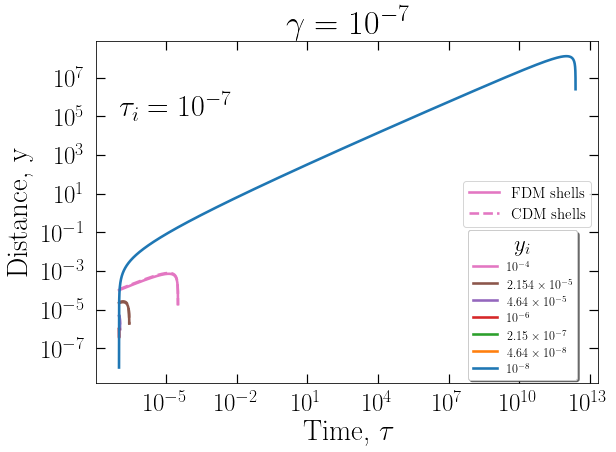

In [23]:
fig, ax = plt.subplots(1, figsize=(9, 6.3))
plt.rc('lines', linewidth=2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')




gamma = 1e-7
tau_f = 1e15
yi_arr = np.geomspace(1e-4, 1e-8, 7)

#array([1.00000000e-08, 4.64158883e-08, 2.15443469e-07, 1.00000000e-06,
      # 4.64158883e-06, 2.15443469e-05, 1.00000000e-04])

colors = ['C6','C5','C4', 'C3', 'C2', 'C1', 'C0'] 
for i, (y_i, color) in enumerate(zip(yi_arr, colors)):
    tau_i = 1e-7      
    v_i = y_i/(2 * tau_i) 
    y0 = [y_i, v_i]
    tau_arr = np.geomspace(tau_i, tau_f, 10000) 

    
    sol_fdm = solve_ivp(j_fdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    sol_cdm = solve_ivp(j_cdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    
    ax.loglog(sol_fdm.t, sol_fdm.y[0], color = color)
    ax.loglog(sol_cdm.t, sol_cdm.y[0]*1.1,  color = color, ls ='--')

    
 
    
ax.tick_params(axis ='x', pad = 9.9)
ax.tick_params(axis ='y', pad = 9.9)
lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["FDM shells", "CDM shells"], title = '',
        title_fontsize = 37, loc = (0.73, 0.455), prop = {"size":15})
legend2 = plt.legend([lines[i] for i in [0, 2, 4, 6, 8, 10, 12]], [  
              r'$10^{-4}$', r'$ 2.154\times10^{-5}$', r'$4.64\times10^{-5}$', r'$10^{-6}$',r'$2.15\times10^{-7}$',
                r'$4.64\times10^{-8}$',  r'$10^{-8}$'                                                  
              ],prop = {'size':12.2},
              loc = (0.74, 0.01),shadow = True, title = '$y_{i}$' ,title_fontsize = 23,
           facecolor = 'white',fontsize = 25)
    
ax.add_artist(legend1)
ax.add_artist(legend2)

plt.text(1e-7, 1e5, r'$\tau_i = 10^{-7}$', fontsize = 30)



plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau$', fontsize=29)
plt.ylabel('Distance, y', fontsize=29, labelpad=9)
plt.title(r'$\gamma = 10^{-7}$', fontsize = 34)
plt.savefig('Diff_shells12.pdf', bbox_inches = 'tight')
plt.show()

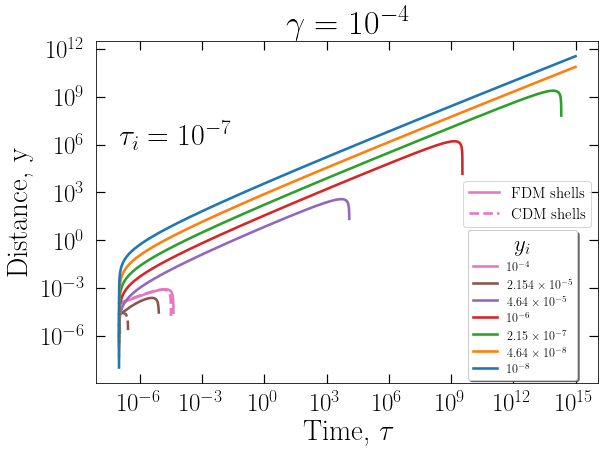

In [24]:
fig, ax = plt.subplots(1, figsize=(9, 6.3))
plt.rc('lines', linewidth=2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')




gamma = 1e-4
tau_f = 1e15
yi_arr = np.geomspace(1e-4, 1e-8, 7)

#array([1.00000000e-08, 4.64158883e-08, 2.15443469e-07, 1.00000000e-06,
      # 4.64158883e-06, 2.15443469e-05, 1.00000000e-04])

colors = ['C6','C5','C4', 'C3', 'C2', 'C1', 'C0'] 
for i, (y_i, color) in enumerate(zip(yi_arr, colors)):
    tau_i = 1e-7      
    v_i = y_i/(2 * tau_i) 
    y0 = [y_i, v_i]
    tau_arr = np.geomspace(tau_i, tau_f, 10000) 

    
    sol_fdm = solve_ivp(j_fdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    sol_cdm = solve_ivp(j_cdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    
    ax.loglog(sol_fdm.t, sol_fdm.y[0], color = color)
    ax.loglog(sol_cdm.t, sol_cdm.y[0]*1.1,  color = color, ls ='--')

    
 
    
ax.tick_params(axis ='x', pad = 9.9)
ax.tick_params(axis ='y', pad = 9.9)
lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["FDM shells", "CDM shells"], title = '',
        title_fontsize = 37, loc = (0.73, 0.455), prop = {"size":15})
legend2 = plt.legend([lines[i] for i in [0, 2, 4, 6, 8, 10, 12]], [  
              r'$10^{-4}$', r'$ 2.154\times10^{-5}$', r'$4.64\times10^{-5}$', r'$10^{-6}$',r'$2.15\times10^{-7}$',
                r'$4.64\times10^{-8}$',  r'$10^{-8}$'                                                  
              ],prop = {'size':12.2},
              loc = (0.74, 0.01),shadow = True, title = '$y_{i}$' ,title_fontsize = 23,
           facecolor = 'white',fontsize = 25)
    
ax.add_artist(legend1)
ax.add_artist(legend2)

plt.text(1e-7, 1e6, r'$\tau_i = 10^{-7}$', fontsize = 30)



plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau$', fontsize=29)
plt.ylabel('Distance, y', fontsize=29, labelpad=9)
plt.title(r'$\gamma = 10^{-4}$', fontsize = 34)
plt.savefig('Diff_shells13.pdf', bbox_inches = 'tight')
plt.show()

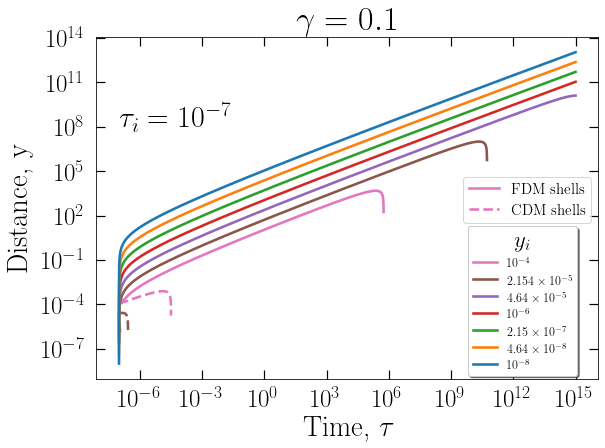

In [25]:
fig, ax = plt.subplots(1, figsize=(9, 6.3))
plt.rc('lines', linewidth=2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')




gamma = 0.1
tau_f = 1e15
yi_arr = np.geomspace(1e-4, 1e-8, 7)

#array([1.00000000e-08, 4.64158883e-08, 2.15443469e-07, 1.00000000e-06,
      # 4.64158883e-06, 2.15443469e-05, 1.00000000e-04])

colors = ['C6','C5','C4', 'C3', 'C2', 'C1', 'C0'] 
for i, (y_i, color) in enumerate(zip(yi_arr, colors)):
    tau_i = 1e-7      
    v_i = y_i/(2 * tau_i) 
    y0 = [y_i, v_i]
    tau_arr = np.geomspace(tau_i, tau_f, 10000) 

    
    sol_fdm = solve_ivp(j_fdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    sol_cdm = solve_ivp(j_cdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    
    ax.loglog(sol_fdm.t, sol_fdm.y[0], color = color)
    ax.loglog(sol_cdm.t, sol_cdm.y[0]*1.1,  color = color, ls ='--')

    
 
    
ax.tick_params(axis ='x', pad = 9.9)
ax.tick_params(axis ='y', pad = 9.9)
lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["FDM shells", "CDM shells"], title = '',
        title_fontsize = 37, loc = (0.73, 0.455), prop = {"size":15})
legend2 = plt.legend([lines[i] for i in [0, 2, 4, 6, 8, 10, 12]], [  
              r'$10^{-4}$', r'$ 2.154\times10^{-5}$', r'$4.64\times10^{-5}$', r'$10^{-6}$',r'$2.15\times10^{-7}$',
                r'$4.64\times10^{-8}$',  r'$10^{-8}$'                                                  
              ],prop = {'size':12.2},
              loc = (0.74, 0.01),shadow = True, title = '$y_{i}$' ,title_fontsize = 23,
           facecolor = 'white',fontsize = 25)
    
ax.add_artist(legend1)
ax.add_artist(legend2)

plt.text(1e-7, 1e8, r'$\tau_i = 10^{-7}$', fontsize = 30)



plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau$', fontsize=29)
plt.ylabel('Distance, y', fontsize=29, labelpad=9)
plt.title(r'$\gamma = 0.1$', fontsize = 34)
plt.savefig('Diff_shells14.pdf', bbox_inches = 'tight')
plt.show()

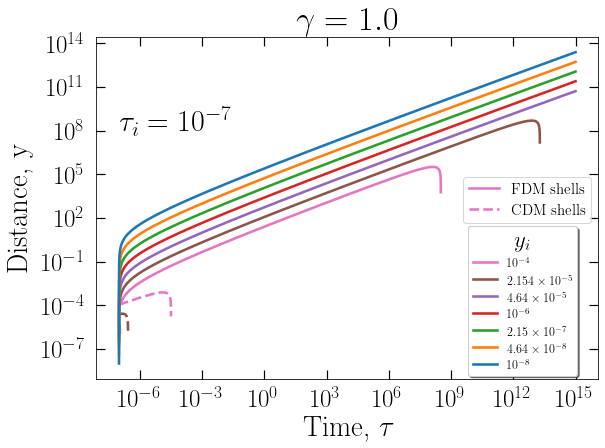

In [26]:
fig, ax = plt.subplots(1, figsize=(9, 6.3))
plt.rc('lines', linewidth=2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')




gamma = 1.0
tau_f = 1e15
yi_arr = np.geomspace(1e-4, 1e-8, 7)

#array([1.00000000e-08, 4.64158883e-08, 2.15443469e-07, 1.00000000e-06,
      # 4.64158883e-06, 2.15443469e-05, 1.00000000e-04])

colors = ['C6','C5','C4', 'C3', 'C2', 'C1', 'C0'] 
for i, (y_i, color) in enumerate(zip(yi_arr, colors)):
    tau_i = 1e-7      
    v_i = y_i/(2 * tau_i) 
    y0 = [y_i, v_i]
    tau_arr = np.geomspace(tau_i, tau_f, 10000) 

    
    sol_fdm = solve_ivp(j_fdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    sol_cdm = solve_ivp(j_cdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    
    ax.loglog(sol_fdm.t, sol_fdm.y[0], color = color)
    ax.loglog(sol_cdm.t, sol_cdm.y[0]*1.1,  color = color, ls ='--')

    
 
    
ax.tick_params(axis ='x', pad = 9.9)
ax.tick_params(axis ='y', pad = 9.9)
lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["FDM shells", "CDM shells"], title = '',
        title_fontsize = 37, loc = (0.73, 0.455), prop = {"size":15})
legend2 = plt.legend([lines[i] for i in [0, 2, 4, 6, 8, 10, 12]], [  
              r'$10^{-4}$', r'$ 2.154\times10^{-5}$', r'$4.64\times10^{-5}$', r'$10^{-6}$',r'$2.15\times10^{-7}$',
                r'$4.64\times10^{-8}$',  r'$10^{-8}$'                                                  
              ],prop = {'size':12.2},
              loc = (0.74, 0.01),shadow = True, title = '$y_{i}$' ,title_fontsize = 23,
           facecolor = 'white',fontsize = 25)
    
ax.add_artist(legend1)
ax.add_artist(legend2)

plt.text(1e-7, 1e8, r'$\tau_i = 10^{-7}$', fontsize = 30)



plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau$', fontsize=29)
plt.ylabel('Distance, y', fontsize=29, labelpad=9)
plt.title(r'$\gamma = 1.0$', fontsize = 34)
plt.savefig('Diff_shells15.pdf', bbox_inches = 'tight')
plt.show()

In [ ]:
# in the previous plots, we saw that when the initial conditions 
# (i.e. y = yi , vi = yi /(2τi )) are set properly, with increase in
# γ, the FDM shells with smaller values of initial distance yi start to 
# get pushed to larger values of turnaround radius yta
# and cross other FDM shells signifying their mutual interactions.
# So, now we want to confirm whether this behaviour of FDM shells is
# universal or depends on the choice of the initial conditions. 

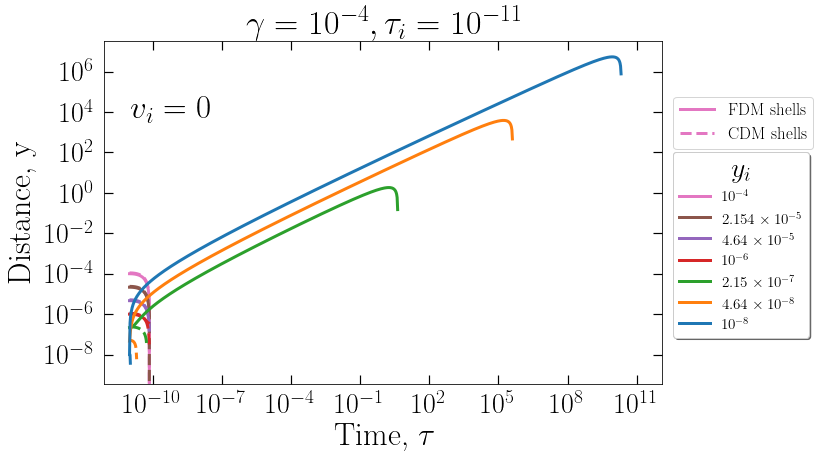

In [40]:
fig, ax = plt.subplots(1, figsize=(10, 6.3))
plt.rc('lines', linewidth= 3)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')




gamma = 1e-4
tau_f = 1e11
yi_arr = np.geomspace(1e-4, 1e-8, 7)


colors = ['C6','C5','C4', 'C3', 'C2', 'C1', 'C0'] 
for i, (y_i, color) in enumerate(zip(yi_arr, colors)):
    tau_i = 1e-11      
    v_i =  1e-6  # 0#(y_i/(2 * tau_i)) #to avoid the cut-off of the simulation by event_y_min for v_i = 0
    y0 = [y_i, v_i]
    tau_arr = np.geomspace(tau_i, tau_f, 1000) 

    
    sol_fdm = solve_ivp(j_fdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    sol_cdm = solve_ivp(j_cdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8,  events=[event_y_max, event_y_min])

    #print("y_i =", y_i, "; y_FDM =", sol_fdm.y[0]), 
    ax.loglog(sol_fdm.t, sol_fdm.y[0], color = color)
    ax.loglog(sol_cdm.t, sol_cdm.y[0]*1.1,  color = color, ls ='--')

    
 
    
ax.tick_params(axis ='x', pad = 9.9)
ax.tick_params(axis ='y', pad = 9.9)
lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["FDM shells", "CDM shells"], title = '',
        title_fontsize = 37, loc = (1.02, 0.685), prop = {"size":17})
legend2 = plt.legend([lines[i] for i in [0, 2, 4, 6, 8, 10, 12]], [  
              r'$10^{-4}$', r'$ 2.154\times10^{-5}$', r'$4.64\times10^{-5}$', r'$10^{-6}$',r'$2.15\times10^{-7}$',
                r'$4.64\times10^{-8}$',  r'$10^{-8}$'                                                  
              ],prop = {'size':15.2},
              loc = (1.02, 0.135),shadow = True, title = '$y_{i}$' ,title_fontsize = 28,
           facecolor = 'white',fontsize = 25)
    
ax.add_artist(legend1)
ax.add_artist(legend2)

plt.text(1e-11, 5e3, r'$v_i = 0$', fontsize = 33)



plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.xlabel(r'Time, $\tau$', fontsize=32)
plt.ylabel('Distance, y', fontsize=32, labelpad=9)
plt.title(r'$\gamma = 10^{-4}, \tau_i = 10^{-11}$', fontsize = 34)
plt.savefig('Diff_shells_vi0.pdf', bbox_inches = 'tight')
plt.show()

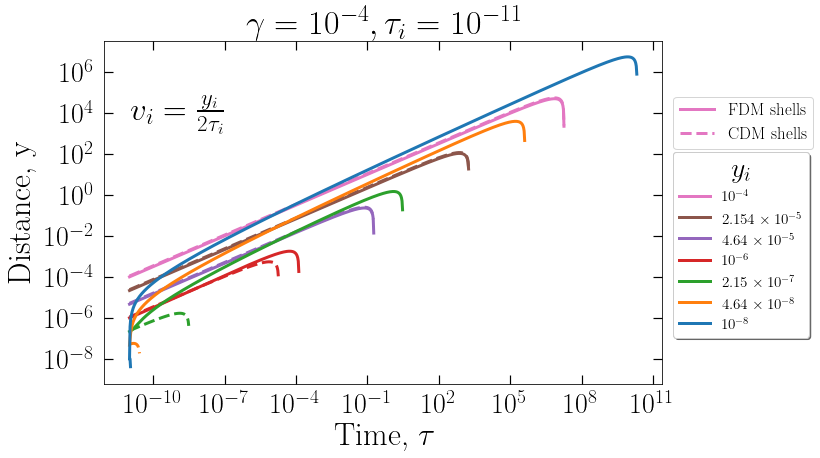

In [17]:
fig, ax = plt.subplots(1, figsize=(10, 6.3))
plt.rc('lines', linewidth=3)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')




gamma = 1e-4
tau_f = 1e11
yi_arr = np.geomspace(1e-4, 1e-8, 7)


colors = ['C6','C5','C4', 'C3', 'C2', 'C1', 'C0'] 
for i, (y_i, color) in enumerate(zip(yi_arr, colors)):
    tau_i = 1e-11      
    v_i = (y_i/(2 * tau_i)) 
    y0 = [y_i, v_i]
    tau_arr = np.geomspace(tau_i, tau_f, 1000) 

    
    sol_fdm = solve_ivp(j_fdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    sol_cdm = solve_ivp(j_cdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8,  events=[event_y_max, event_y_min])

    #print("y_i =", y_i, "; y_FDM =", sol_fdm.y[0]), 
    ax.loglog(sol_fdm.t, sol_fdm.y[0], color = color)
    ax.loglog(sol_cdm.t, sol_cdm.y[0]*1.1,  color = color, ls ='--')

    

ax.tick_params(axis ='x', pad = 9.9)
ax.tick_params(axis ='y', pad = 9.9)   
lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["FDM shells", "CDM shells"], title = '',
        title_fontsize = 37, loc = (1.02, 0.685), prop = {"size":17})
legend2 = plt.legend([lines[i] for i in [0, 2, 4, 6, 8, 10, 12]], [  
              r'$10^{-4}$', r'$ 2.154\times10^{-5}$', r'$4.64\times10^{-5}$', r'$10^{-6}$',r'$2.15\times10^{-7}$',
                r'$4.64\times10^{-8}$',  r'$10^{-8}$'                                                  
              ],prop = {'size':15.2},
              loc = (1.02, 0.135),shadow = True, title = '$y_{i}$' ,title_fontsize = 28,
           facecolor = 'white',fontsize = 25)
    
ax.add_artist(legend1)
ax.add_artist(legend2)

plt.text(1e-11, 5e3, r'$v_i = \frac{y_i}{2\tau_i}$', fontsize = 33)



plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.xlabel(r'Time, $\tau$', fontsize=32)
plt.ylabel('Distance, y', fontsize=32, labelpad=9)
plt.title(r'$\gamma = 10^{-4}, \tau_i = 10^{-11}$', fontsize = 34)
plt.savefig('Diff_shells_vi.pdf', bbox_inches = 'tight')
plt.show()

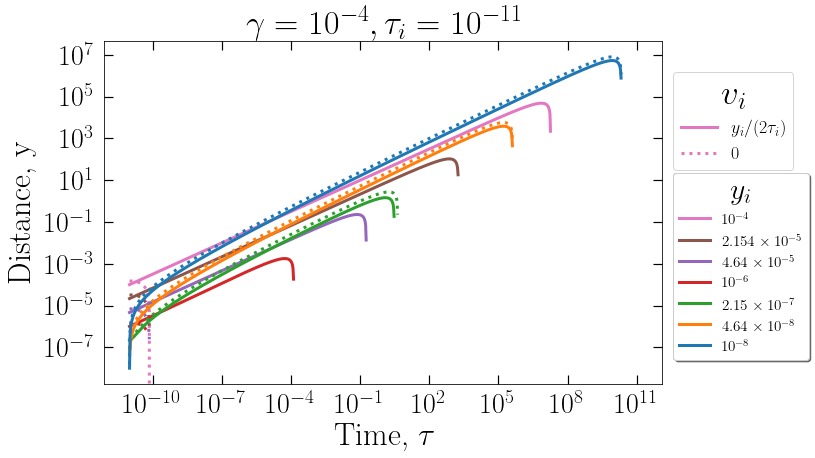

In [42]:
fig, ax = plt.subplots(1, figsize=(10, 6.3))
plt.rc('lines', linewidth=3)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')




gamma = 1e-4
tau_f = 1e11
yi_arr = np.geomspace(1e-4, 1e-8, 7)


colors = ['C6','C5','C4', 'C3', 'C2', 'C1', 'C0'] 
for i, (y_i, color) in enumerate(zip(yi_arr, colors)):
   
    v_i1 = (y_i/(2 * tau_i)) 
    y01 = [y_i, v_i1]
    tau_arr = np.geomspace(tau_i, tau_f, 1000) 

    
    sol_fdm1 = solve_ivp(j_fdm, [tau_i, tau_f], y01, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    sol_cdm1 = solve_ivp(j_cdm, [tau_i, tau_f], y01, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8,  events=[event_y_max, event_y_min])

     
    
         
    v_i2 = 1e-6 #(y_i/(2 * tau_i)) 
    y02 = [y_i, v_i]
    tau_arr = np.geomspace(tau_i, tau_f, 1000) 

    
    sol_fdm2 = solve_ivp(j_fdm, [tau_i, tau_f], y02, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    sol_cdm2 = solve_ivp(j_cdm, [tau_i, tau_f], y02, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8,  events=[event_y_max, event_y_min])

    ax.loglog(sol_fdm1.t, sol_fdm1.y[0], color = color)
    ax.loglog(sol_fdm2.t, sol_fdm2.y[0]*1.5, color = color,  ls =':')
    

ax.tick_params(axis ='x', pad = 9.9)
ax.tick_params(axis ='y', pad = 9.9)   
lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], [r"$y_i/(2\tau_i)$", "0"], title = '$v_i$',
        title_fontsize = 35, loc = (1.02, 0.625), prop = {"size":18})
legend2 = plt.legend([lines[i] for i in [0, 2, 4, 6, 8, 10, 12]], [  
              r'$10^{-4}$', r'$ 2.154\times10^{-5}$', r'$4.64\times10^{-5}$', r'$10^{-6}$',r'$2.15\times10^{-7}$',
                r'$4.64\times10^{-8}$',  r'$10^{-8}$'                                                  
              ],prop = {'size':15.2},
              loc = (1.02, 0.07),shadow = True, title = '$y_{i}$' ,title_fontsize = 30,
           facecolor = 'white',fontsize = 25)
    
ax.add_artist(legend1)
ax.add_artist(legend2)

#plt.text(1e-11, 5e3, r'$v_i = \frac{y_i}{2\tau_i}$', fontsize = 33)



plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.xlabel(r'Time, $\tau$', fontsize=32)
plt.ylabel('Distance, y', fontsize=32, labelpad=9)
plt.title(r'$\gamma = 10^{-4}, \tau_i = 10^{-11}$', fontsize = 34)
plt.savefig('Diff_shells_vicomb.pdf', bbox_inches = 'tight')
plt.show()

In [114]:
#The above figure shows that the lines (blue and orange) corresponding to 
# the two smallest values of yi , they exactly overlap each-
# other whether v_i = 0 or v_i = y_i /(2τ_i ). So, this concludes that 
# this dynamics of smaller FDM shells in independent of
# the initial conditions and comes from the contribution of the Q.P. of FDM bosons.

In [115]:
#Dynamics of FDM shells for various values of gamma keeping y_i fixed. 

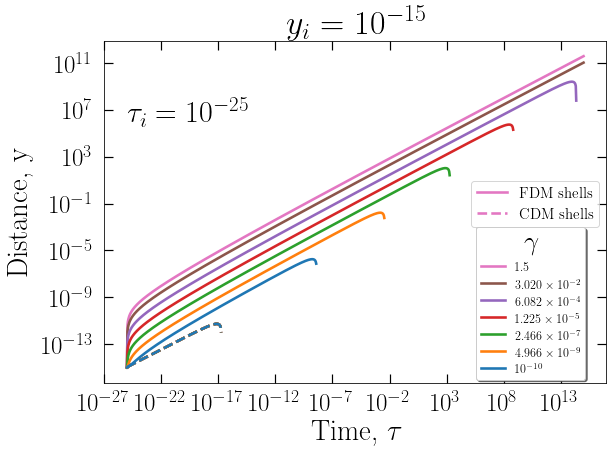

In [26]:
fig, ax = plt.subplots(1, figsize=(9, 6.3))
plt.rc('lines', linewidth=2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')





y_i = 1e-15
tau_i = 1e-25
tau_f = 1e15
tau_arr = np.geomspace(tau_i, tau_f, 1000)
v_i = y_i/(2 * tau_i) 
y0 = [y_i, v_i]


gamma_arr = np.geomspace(1.5, 1e-10, 7)



colors = ['C6','C5', 'C4', 'C3', 'C2', 'C1', 'C0'] 
for i, (gamma, color) in enumerate(zip(gamma_arr, colors)):
    
    sol_fdm = solve_ivp(j_fdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    sol_cdm = solve_ivp(j_cdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8,  events=[event_y_max, event_y_min])

    
    ax.loglog(sol_fdm.t, sol_fdm.y[0], color = color)
    ax.loglog(sol_cdm.t, sol_cdm.y[0]*1.1,  color = color, ls ='--')

    
 
    
ax.tick_params(axis ='x', pad = 9.9)
ax.tick_params(axis ='y', pad = 9.9)
#array([1.00000000e-10, 4.96609713e-09, 2.46621207e-07, 1.22474487e-05,
      # 6.08220200e-04, 3.02048059e-02, 1.50000000e+00])
lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["FDM shells", "CDM shells"], title = '',
        title_fontsize = 37, loc = (0.73, 0.455), prop = {"size":15})
legend2 = plt.legend([lines[i] for i in [0, 2, 4, 6, 8, 10, 12]], [r'$1.5$',   r'$3.020\times10^{-2}$',  r'$6.082\times10^{-4}$',  r'$1.225\times10^{-5}$',   r'$2.466\times10^{-7}$',
             r'$4.966\times10^{-9}$', r'$10^{-10}$'],prop = {'size':12.2},
              loc = (0.74, 0.01),shadow = True, title = r'$\gamma$' ,title_fontsize = 27,
           facecolor = 'white',fontsize = 25)    
ax.add_artist(legend1)
ax.add_artist(legend2)


  
plt.text(1e-25, 1e6, r'$\tau_i = 10^{-25}$', fontsize = 30)
#plt.text(1e-25, 1e3, r'$\tau_f = 10^{10}$', fontsize = 30)


plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau$', fontsize=29)
plt.ylabel('Distance, y', fontsize=29, labelpad=9)
plt.title(r'$y_i = 10^{-15}$', fontsize=34)
plt.savefig('y1.pdf', bbox_inches = 'tight')
plt.show()

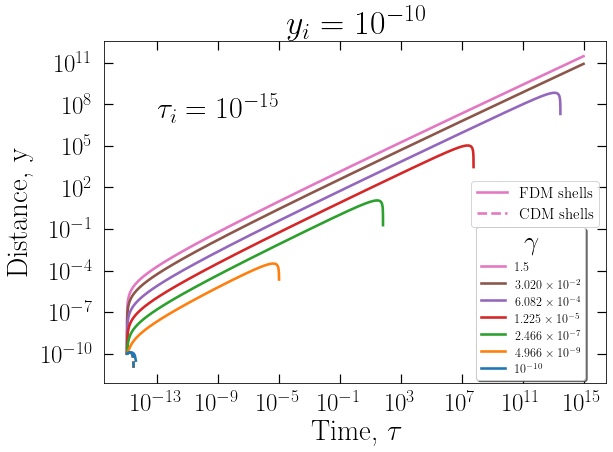

In [29]:
fig, ax = plt.subplots(1, figsize=(9, 6.3))
plt.rc('lines', linewidth=2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')





y_i = 1e-10
tau_i = 1e-15
tau_f = 1e15
tau_arr = np.geomspace(tau_i, tau_f, 10000)
v_i = y_i/(2 * tau_i) 
y0 = [y_i, v_i]


gamma_arr = np.geomspace(1.5, 1e-10, 7)



colors = ['C6','C5', 'C4', 'C3', 'C2', 'C1', 'C0'] 
for i, (gamma, color) in enumerate(zip(gamma_arr, colors)):
    
    sol_fdm = solve_ivp(j_fdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    sol_cdm = solve_ivp(j_cdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8,  events=[event_y_max, event_y_min])

    
    ax.loglog(sol_fdm.t, sol_fdm.y[0], color = color)
    ax.loglog(sol_cdm.t, sol_cdm.y[0]*1.1,  color = color, ls ='--')

    
 
    
ax.tick_params(axis ='x', pad = 9.9)
ax.tick_params(axis ='y', pad = 9.9)
lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["FDM shells", "CDM shells"], title = '',
        title_fontsize = 37, loc = (0.73, 0.455), prop = {"size":15})
legend2 = plt.legend([lines[i] for i in [0, 2, 4, 6, 8, 10, 12]], [r'$1.5$',   r'$3.020\times10^{-2}$',  r'$6.082\times10^{-4}$',  r'$1.225\times10^{-5}$',   r'$2.466\times10^{-7}$',
             r'$4.966\times10^{-9}$', r'$10^{-10}$'],prop = {'size':12.2},
              loc = (0.74, 0.01),shadow = True, title = r'$\gamma$'  ,title_fontsize = 27,
           facecolor = 'white',fontsize = 25)    
ax.add_artist(legend1)
ax.add_artist(legend2)
  
plt.text(1e-13, 1e7, r'$\tau_i = 10^{-15}$', fontsize = 30)
#plt.text(1e-15, 1e5, r'$\tau_f = 10^{10}$', fontsize = 30)



plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau$', fontsize=29)
plt.ylabel('Distance, y', fontsize=29, labelpad=9)
plt.title(r'$y_i = 10^{-10}$', fontsize=34)
plt.savefig('y2.pdf', bbox_inches = 'tight')
plt.show()

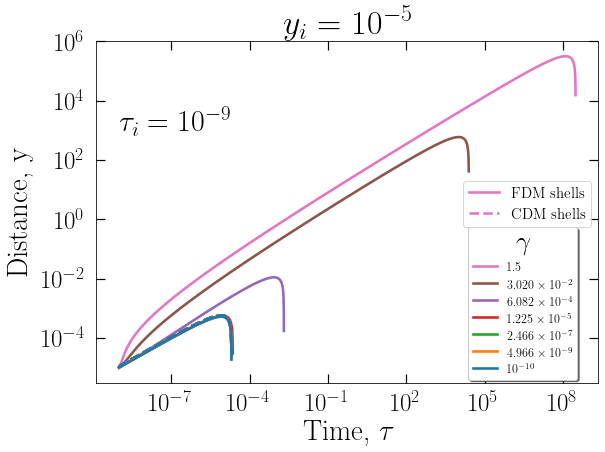

In [34]:
fig, ax = plt.subplots(1, figsize=(9, 6.3))
plt.rc('lines', linewidth=2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')





y_i = 1e-5
tau_i = 1e-9
tau_f = 1e15
tau_arr = np.geomspace(tau_i, tau_f, 10000)
v_i = y_i/(2 * tau_i) 
y0 = [y_i, v_i]


gamma_arr = np.geomspace(1.5, 1e-10, 7)



colors = ['C6','C5', 'C4', 'C3', 'C2', 'C1', 'C0'] 
for i, (gamma, color) in enumerate(zip(gamma_arr, colors)):
    
    sol_fdm = solve_ivp(j_fdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    sol_cdm = solve_ivp(j_cdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8,  events=[event_y_max, event_y_min])

    
    ax.loglog(sol_fdm.t, sol_fdm.y[0], color = color)
    ax.loglog(sol_cdm.t, sol_cdm.y[0]*1.1,  color = color, ls ='--')

    
 
    
ax.tick_params(axis ='x', pad = 9.9)
ax.tick_params(axis ='y', pad = 9.9)
lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["FDM shells", "CDM shells"], title = '',
        title_fontsize = 37, loc = (0.73, 0.455), prop = {"size":15})
legend2 = plt.legend([lines[i] for i in [0, 2, 4, 6, 8, 10, 12]], [r'$1.5$',   r'$3.020\times10^{-2}$',  r'$6.082\times10^{-4}$',  r'$1.225\times10^{-5}$',   r'$2.466\times10^{-7}$',
             r'$4.966\times10^{-9}$', r'$10^{-10}$'],prop = {'size':12.2},
              loc = (0.74, 0.01),shadow = True, title = r'$\gamma$'  ,title_fontsize = 27,
           facecolor = 'white',fontsize = 25)    
ax.add_artist(legend1)
ax.add_artist(legend2)
  
plt.text(1e-9, 1e3, r'$\tau_i = 10^{-9}$', fontsize = 30)
#plt.text(1e-9, 1e3, r'$\tau_f = 10^{10}$', fontsize = 30)


plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau$', fontsize=29)
plt.ylabel('Distance, y', fontsize=29, labelpad=9)
plt.title(r'$y_i = 10^{-5}$', fontsize=34)
plt.savefig('y3.pdf', bbox_inches = 'tight')
plt.show()

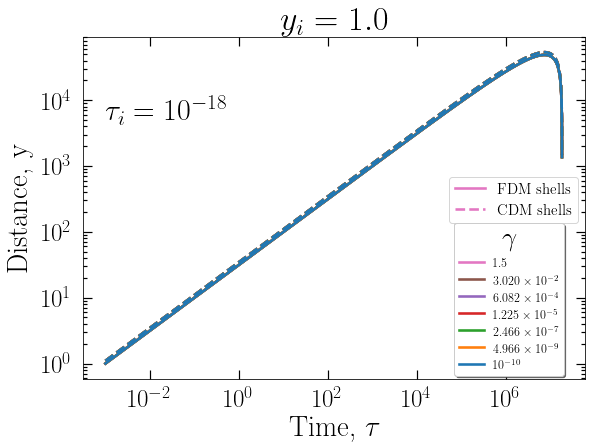

In [38]:
fig, ax = plt.subplots(1, figsize=(9, 6.3))
plt.rc('lines', linewidth=2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')





y_i = 1
tau_i = 1e-3
tau_f = 1e15
tau_arr = np.geomspace(tau_i, tau_f, 10000)
v_i = y_i/(2 * tau_i) 
y0 = [y_i, v_i]


gamma_arr = np.geomspace(1.5, 1e-10, 7)



colors = ['C6','C5', 'C4', 'C3', 'C2', 'C1', 'C0'] 
for i, (gamma, color) in enumerate(zip(gamma_arr, colors)):
    
    sol_fdm = solve_ivp(j_fdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    sol_cdm = solve_ivp(j_cdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8,  events=[event_y_max, event_y_min])

    
    ax.loglog(sol_fdm.t, sol_fdm.y[0], color = color)
    ax.loglog(sol_cdm.t, sol_cdm.y[0]*1.1,  color = color, ls ='--')

    
 
    
ax.tick_params(axis ='x', pad = 9.9)
ax.tick_params(axis ='y', pad = 9.9)
lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["FDM shells", "CDM shells"], title = '',
        title_fontsize = 37, loc = (0.73, 0.455), prop = {"size":15})
legend2 = plt.legend([lines[i] for i in [0, 2, 4, 6, 8, 10, 12]], [r'$1.5$',   r'$3.020\times10^{-2}$',  r'$6.082\times10^{-4}$',  r'$1.225\times10^{-5}$',   r'$2.466\times10^{-7}$',
             r'$4.966\times10^{-9}$', r'$10^{-10}$'],prop = {'size':12.2},
              loc = (0.74, 0.01),shadow = True, title = r'$\gamma$'  ,title_fontsize = 27,
           facecolor = 'white',fontsize = 25)    
ax.add_artist(legend1)
ax.add_artist(legend2) 


plt.text(1e-3, 5e3, r'$\tau_i = 10^{-18}$', fontsize = 30)
#plt.text(1e-3, 3e3, r'$\tau_f = 10^{10}$', fontsize = 30)


plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau$', fontsize=29)
plt.ylabel('Distance, y', fontsize=29, labelpad=9)
plt.title(r'$y_i = 1.0$', fontsize=34)
plt.savefig('y4.pdf', bbox_inches = 'tight')
plt.show()

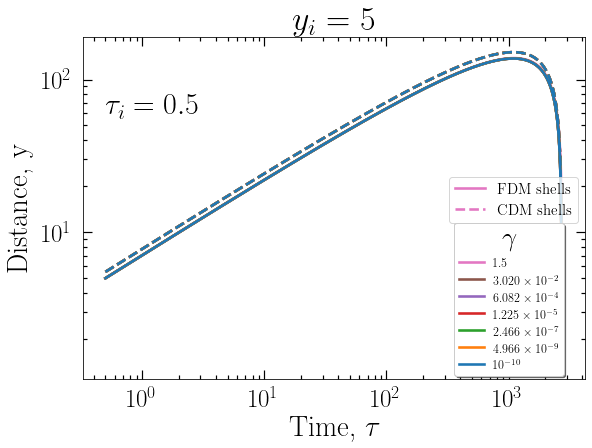

In [120]:
fig, ax = plt.subplots(1, figsize=(9, 6.3))
plt.rc('lines', linewidth=2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')





y_i = 5
tau_i = 0.5
tau_f = 1e15
tau_arr = np.geomspace(tau_i, tau_f, 10000)
v_i = y_i/(2 * tau_i) 
y0 = [y_i, v_i]


gamma_arr = np.geomspace(1.5, 1e-10, 7)



colors = ['C6','C5', 'C4', 'C3', 'C2', 'C1', 'C0'] 
for i, (gamma, color) in enumerate(zip(gamma_arr, colors)):
    
    sol_fdm = solve_ivp(j_fdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    sol_cdm = solve_ivp(j_cdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8,  events=[event_y_max, event_y_min])

    
    ax.loglog(sol_fdm.t, sol_fdm.y[0], color = color)
    ax.loglog(sol_cdm.t, sol_cdm.y[0]*1.1,  color = color, ls ='--')

    
 
    


ax.tick_params(axis ='x', pad = 9.9)
ax.tick_params(axis ='y', pad = 9.9)
lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["FDM shells", "CDM shells"], title = '',
        title_fontsize = 37, loc = (0.73, 0.455), prop = {"size":15})
legend2 = plt.legend([lines[i] for i in [0, 2, 4, 6, 8, 10, 12]], [r'$1.5$',   r'$3.020\times10^{-2}$',  r'$6.082\times10^{-4}$',  r'$1.225\times10^{-5}$',   r'$2.466\times10^{-7}$',
             r'$4.966\times10^{-9}$', r'$10^{-10}$'],prop = {'size':12.2},
              loc = (0.74, 0.01),shadow = True, title = r'$\gamma$'  ,title_fontsize = 27,
           facecolor = 'white',fontsize = 25)    
ax.add_artist(legend1)
ax.add_artist(legend2) 
  
plt.text(0.5, 60, r'$\tau_i = 0.5$', fontsize = 30)
#plt.text(1e-3, 3e3, r'$\tau_f = 10^{10}$', fontsize = 30)


plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau$', fontsize=29)
plt.ylabel('Distance, y', fontsize=29, labelpad=9)
plt.title(r'$y_i = 5$', fontsize=34)
plt.savefig('y5.pdf', bbox_inches = 'tight')
plt.show()

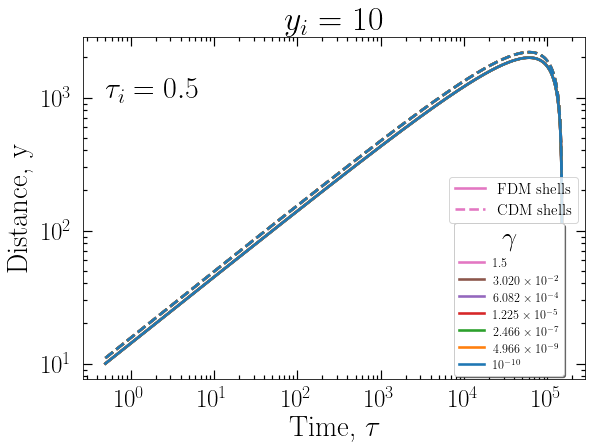

In [121]:
fig, ax = plt.subplots(1, figsize=(9, 6.3))
plt.rc('lines', linewidth=2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')





y_i = 10
tau_i = 0.5
tau_f = 1e15
tau_arr = np.geomspace(tau_i, tau_f, 10000)
v_i = y_i/(2 * tau_i) 
y0 = [y_i, v_i]


gamma_arr = np.geomspace(1.5, 1e-10, 7)



colors = ['C6','C5', 'C4', 'C3', 'C2', 'C1', 'C0'] 
for i, (gamma, color) in enumerate(zip(gamma_arr, colors)):
    
    sol_fdm = solve_ivp(j_fdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    sol_cdm = solve_ivp(j_cdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8,  events=[event_y_max, event_y_min])

    
    ax.loglog(sol_fdm.t, sol_fdm.y[0], color = color)
    ax.loglog(sol_cdm.t, sol_cdm.y[0]*1.1,  color = color, ls ='--')

    
 
    
ax.tick_params(axis ='x', pad = 9.9)
ax.tick_params(axis ='y', pad = 9.9)

lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["FDM shells", "CDM shells"], title = '',
        title_fontsize = 37, loc = (0.73, 0.455), prop = {"size":15})
legend2 = plt.legend([lines[i] for i in [0, 2, 4, 6, 8, 10, 12]], [r'$1.5$',   r'$3.020\times10^{-2}$',  r'$6.082\times10^{-4}$',  r'$1.225\times10^{-5}$',   r'$2.466\times10^{-7}$',
             r'$4.966\times10^{-9}$', r'$10^{-10}$'],prop = {'size':12.2},
              loc = (0.74, 0.01),shadow = True, title = r'$\gamma$'  ,title_fontsize = 27,
           facecolor = 'white',fontsize = 25)    
ax.add_artist(legend1)
ax.add_artist(legend2)


plt.text(0.5, 1e3, r'$\tau_i = 0.5$', fontsize = 30)
#plt.text(1e-3, 3e3, r'$\tau_f = 10^{10}$', fontsize = 30)


plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau$', fontsize=29)
plt.ylabel('Distance, y', fontsize=29, labelpad=9)
plt.title(r'$y_i = 10$', fontsize=34)
plt.savefig('y6.pdf', bbox_inches = 'tight')
plt.show()

In [122]:
# Calculation of the turnaround radius of the FDM shells.

In [44]:
# Turnaround radius of FDM shell when the quantum pressure 
# of FDM Bosons is considered negligible under the assumption 
# that the typical size of the solitonic radius should always much 
# smaller than the typical size of the Turnaround radius of FDM shell around a PBH. 
# This eq. is similar to eq.(5) in reference
# "WIMPs and stellar-mass primordial black holes are incompatible".
# Also calculated as the Turnaround radius of CDM shells in the first project. 



# Turnaround radius of the FDM shell around PBH of mass M_pbh.



# Ignoring the gamma term for much smaller values of gamma which coincides
# with the turnaround of CDM shell around the PBH of mass M

#here, tau = tau_ta

import scipy.optimize as optimize
import warnings
warnings.filterwarnings('ignore', 'The iteration is not making good progress')


def r_turnaround_cdm(tau):  
    return (4  * (tau**(2)))**(1/3)



#def r_turnaround_full(tau, gamma):
   # def expression(y_ta):
      #  return (y_ta**4) - (4 * y_ta * (tau**2)) - ((2*gamma - gamma**2) * (tau**2))
    #r_ta_initial = max(r_turnaround_cdm(tau), 1e-2)
    #r_ta_solution = fsolve(expression, r_ta_initial)
    #return r_ta_solution[0]



# Full analytic turnaround radius
def r_turnaround_fdm(tau, gamma): 
    def expression(y_ta):
        return (y_ta**4) - (4 * y_ta * (tau**2)) + (2 * gamma - gamma**2) * (tau**2)
    factor = 0.635 * (1 + 0.01 * np.log10(1 + gamma))
    #print(factor)
    r_ta_initial = factor * (8 * (tau**2))**(1/3)
    sol = optimize.fsolve(expression, r_ta_initial, xtol=1e-10)[0]
    return sol




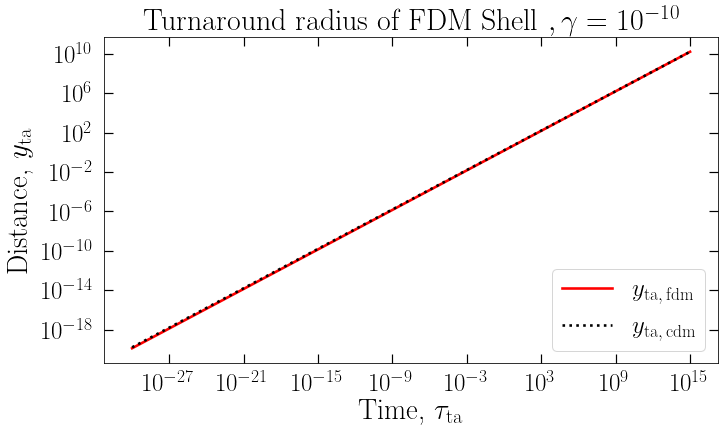

In [124]:
gamma = 1e-10
tau_arr = np.linspace(1e-30, 1e15, 10000)


fig,ax = plt.subplots(1, figsize = (11, 6))
plt.rc('lines', linewidth = 2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')


plt.loglog(tau_arr, [r_turnaround_fdm(tau, gamma) for tau in tau_arr],'r', linestyle = '-')
plt.loglog(tau_arr, r_turnaround_cdm(tau_arr),'k', linestyle = ':')

ax.tick_params(axis='x', pad = 9.9)
ax.tick_params(axis='y', pad = 9.9)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau_\mathrm{ta}$', fontsize=29)
plt.ylabel('Distance, $y_\mathrm{ta}$', fontsize=29, labelpad=9)
plt.legend([ '$y_\mathrm{ta,\,fdm}$', '$y_\mathrm{ta,\,cdm}$'],
            title_fontsize = 20, loc = 'lower right', prop = {"size":25})
plt.title(r'Turnaround radius of FDM Shell $, \gamma = 10^{-10}$', fontsize = 30)
#plt.savefig("r_ta.pdf", bbox_inches = "tight")
plt.show()

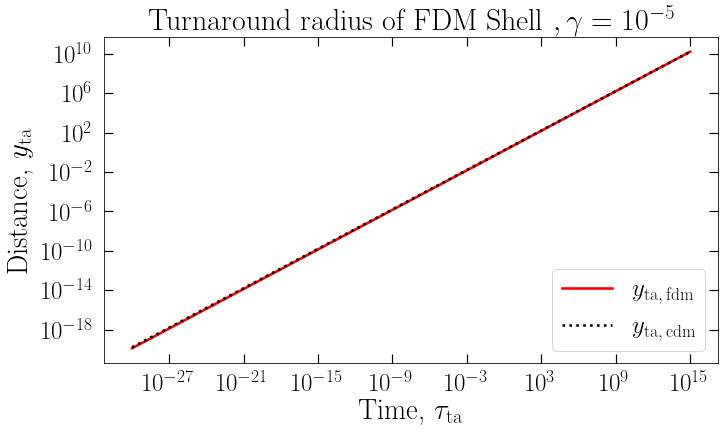

In [125]:
gamma = 1e-5
gamma = 1e-10
tau_arr = np.linspace(1e-30, 1e15, 10000)


fig,ax = plt.subplots(1, figsize = (11, 6))
plt.rc('lines', linewidth = 2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')


plt.loglog(tau_arr, [r_turnaround_fdm(tau, gamma) for tau in tau_arr],'r', linestyle = '-')
plt.loglog(tau_arr, r_turnaround_cdm(tau_arr),'k', linestyle = ':')

ax.tick_params(axis='x', pad = 9.9)
ax.tick_params(axis='y', pad = 9.9)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau_\mathrm{ta}$', fontsize=29)
plt.ylabel('Distance, $y_\mathrm{ta}$', fontsize=29, labelpad=9)
plt.legend([ '$y_\mathrm{ta,\,fdm}$', '$y_\mathrm{ta,\,cdm}$'],
            title_fontsize = 20, loc = 'lower right', prop = {"size":25})
plt.title(r'Turnaround radius of FDM Shell $, \gamma = 10^{-5}$', fontsize = 30)
#plt.savefig("r_ta.pdf", bbox_inches = "tight")
plt.show()

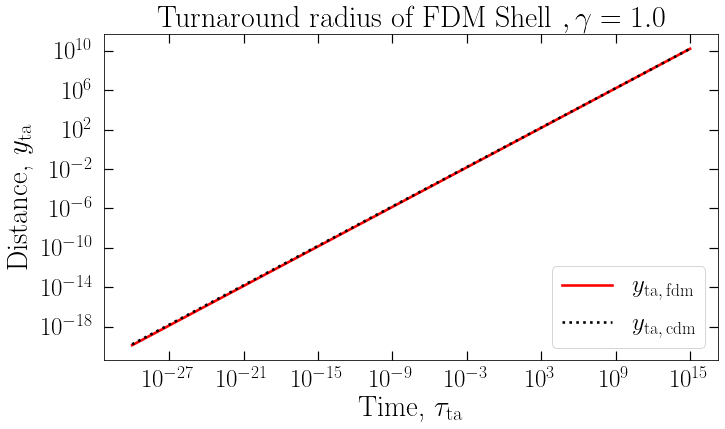

In [126]:
gamma = 1.0
gamma = 1e-10
tau_arr = np.linspace(1e-30, 1e15, 10000)


fig,ax = plt.subplots(1, figsize = (11, 6))
plt.rc('lines', linewidth = 2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')


plt.loglog(tau_arr, [r_turnaround_fdm(tau, gamma) for tau in tau_arr],'r', linestyle = '-')
plt.loglog(tau_arr, r_turnaround_cdm(tau_arr),'k', linestyle = ':')

ax.tick_params(axis='x', pad = 9.9)
ax.tick_params(axis='y', pad = 9.9)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau_\mathrm{ta}$', fontsize=29)
plt.ylabel('Distance, $y_\mathrm{ta}$', fontsize=29, labelpad=9)
plt.legend([ '$y_\mathrm{ta,\,fdm}$', '$y_\mathrm{ta,\,cdm}$'],
            title_fontsize = 20, loc = 'lower right', prop = {"size":25})
plt.title(r'Turnaround radius of FDM Shell $, \gamma = 1.0$', fontsize = 30)
#plt.savefig("r_ta.pdf", bbox_inches = "tight")
plt.show()

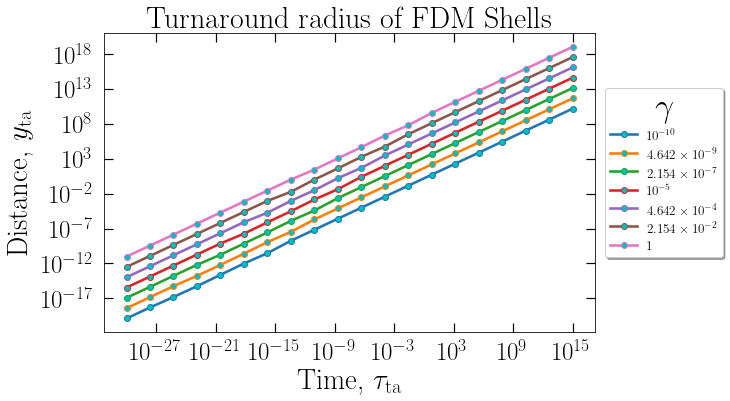

In [127]:
# y_ta bs tau_ta for various values of gamma

fig,ax = plt.subplots(1, figsize = (8.8, 5.5))
plt.rc('lines', linewidth = 2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')

tau_arr = np.geomspace(1e-30, 1e15, 20)
gamma_arr = np.geomspace(1e-10 , 1, 7)


#array([1.00000000e-10, 4.64158883e-09, 2.15443469e-07, 1.00000000e-05,
      # 4.64158883e-04, 2.15443469e-02, 1.00000000e+00])



y_ta_fdm =  np.zeros(len(tau_arr))
for i, gamma in enumerate(gamma_arr):
    for j, tau in enumerate(tau_arr):
        y_ta_fdm[j] = r_turnaround_fdm(tau, gamma) 
    y_ta_fdm_scaled = y_ta_fdm * (30**i) 
    #ax.loglog(tau_arr, y_ta_fdm_scaled)
    ax.loglog(tau_arr, y_ta_fdm_scaled,  marker='o', markersize=6, markerfacecolor='c', linestyle='-')
    

    
ax.tick_params(axis='x', pad = 9.9)
ax.tick_params(axis='y', pad = 9.9)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau_\mathrm{ta}$', fontsize=29)
plt.ylabel('Distance, $y_\mathrm{ta}$', fontsize=29, labelpad=9)
plt.legend([r'$10^{-10}$', r'$ 4.642\times10^{-9}$', r'$2.154\times10^{-7}$',  r'$10^{-5}$',  r'$4.642\times10^{-4}$', r'$2.154\times10^{-2}$', r'$1$'],prop = {'size':13.2}, loc = (1.02, 0.25),shadow = True, title = '$\gamma$' ,title_fontsize = 34,
           facecolor = 'white',fontsize = 25)
plt.title(r'Turnaround radius of FDM Shells', fontsize = 30)
plt.savefig("y_ta.pdf", bbox_inches = "tight")
plt.show()

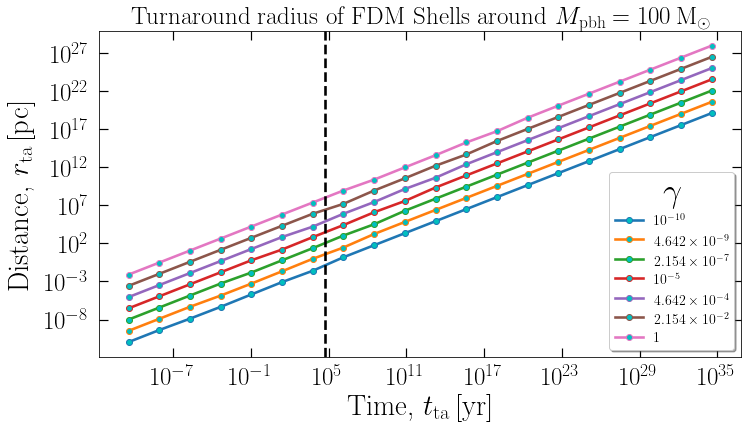

In [128]:
# r_ta vs t_ta for a pbh of M_pbh = 100 M_solar


fig,ax = plt.subplots(1, figsize = (11.5, 6))
plt.rc('lines', linewidth = 2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')


M_pbh = 100 * M_solar
rQ = (hbar**2)/(G * M_pbh * (m_FDM**2))
tQ = ((rQ**3)/(G * M_pbh))**(1/2)


tau_arr = np.geomspace(1e-30, 1e15, 20)
gamma_arr = np.geomspace(1e-10, 1, 7)

for i, gamma in enumerate(gamma_arr):
    y = np.array([(r_turnaround_fdm(tau, gamma) * (30**i)) for tau in tau_arr])
    tau = np.array(tau_arr)
    #ax.loglog((tau * tQ)/yr, (y*rQ)/pc)
    ax.loglog((tau * tQ)/yr, (y*rQ)/pc,  marker='o', markersize=6, markerfacecolor='c', linestyle='-')
    
    

ax.axvline(x = t_eq/yr, color = 'k', linestyle = '--')    
ax.tick_params(axis='x', pad = 9.9)
ax.tick_params(axis='y', pad = 9.9)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $t_\mathrm{ta}\, \mathrm{[yr]}$', fontsize=29)
plt.ylabel('Distance, $r_\mathrm{ta}\, \mathrm{[pc]}$', fontsize=29, labelpad=9)
plt.legend([r'$10^{-10}$', r'$ 4.642\times10^{-9}$', r'$2.154\times10^{-7}$',  r'$10^{-5}$',  r'$4.642\times10^{-4}$', r'$2.154\times10^{-2}$', r'$1$'],
           prop = {'size':14}, loc = 'lower right', shadow = True, title = '$\gamma$' ,title_fontsize = 34,
           facecolor = 'white',fontsize = 25)
plt.title(r'Turnaround radius of FDM Shells around $M_\mathrm{pbh} =100 \, \mathrm{M_{\odot}} $', fontsize = 25)
plt.savefig("r_ta.pdf", bbox_inches = "tight")
plt.show()

In [129]:
# The previous plots of y_ta vs tau_ta, show that for all 
# values of gamma, the curves for y_ta vs tau_ta overlap withb each other.
# For, clarity of visibility, all the curves in these two plots are
# scaled by a factor of (30 * (10**i)) for i in range of len(gamma_arr).

In [130]:
#Comparison of the anamytical and numerical values of y_ta for different FDM shells

y_i = 4.6416e-06 , tau_ta_numerical = 7.2830e+13 , yta_numerical = 2.2598e+09 , yta_analytic = 2.7684e+09
y_i = 1.0000e-06 , tau_ta_numerical = 7.2831e+09 , yta_numerical = 4.8687e+06 , yta_analytic = 5.9644e+06
y_i = 2.1544e-07 , tau_ta_numerical = 7.2832e+05 , yta_numerical = 1.0489e+04 , yta_analytic = 1.2850e+04
y_i = 4.6416e-08 , tau_ta_numerical = 7.2832e+01 , yta_numerical = 2.2599e+01 , yta_analytic = 2.7684e+01
y_i = 1.0000e-08 , tau_ta_numerical = 7.2833e-03 , yta_numerical = 4.8688e-02 , yta_analytic = 5.9645e-02


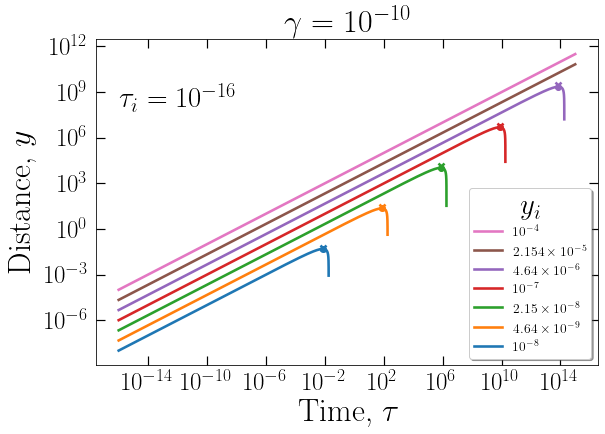

In [49]:
gamma = 1e-10
tau_f = 1e15
yi_arr = np.geomspace(1e-4, 1e-8, 7)


fig, ax = plt.subplots(1, figsize = (9, 6))
plt.rc('lines', linewidth = 2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')

colors = ['C6', 'C5', 'C4', 'C3', 'C2', 'C1', 'C0']


marker_handles = []
for i, (y_i, color) in enumerate(zip(yi_arr, colors)):
    tau_i = 1e-16
    v_i = y_i / (2 * tau_i) 
    y0 = [y_i, v_i]
    tau_arr = np.geomspace(tau_i, tau_f, 100000) 

    
    sol_fdm = solve_ivp(j_fdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-8, atol=1e-8, events=[event_y_max, event_y_min])

    ax.loglog(sol_fdm.t, sol_fdm.y[0], color=color, label=f'FDM $y_i={y_i:.1e}$')

    if len(sol_fdm.t_events[0]) > 0: 
        tauta_numerical = sol_fdm.t_events[0][0]
        yta_numerical = sol_fdm.y_events[0][0][0]
        yta_analytic = r_turnaround_fdm(tauta_numerical, gamma)
        print( "y_i =", '%0.4e'%y_i , ",",  "tau_ta_numerical =", '%0.4e'%tauta_numerical, ",", "yta_numerical =", '%0.4e'%yta_numerical, ",", "yta_analytic =", '%0.4e'%yta_analytic)
            
        yta_numerical_marker = ax.scatter(tauta_numerical, yta_numerical,color=color, zorder=1  )
        yta_analytic_marker = ax.scatter(tauta_numerical, yta_analytic, color=color,  marker='x',  zorder=9)
        if i == 0:
            marker_handles.append((yta_numerical_marker, "Numerical "))
            marker_handles.append((yta_analytic_marker, "Analytic"))

if len(marker_handles) == 2:  
    legend1 = plt.legend(
        handles=[marker_handles[0][0], marker_handles[1][0]],
        labels=[marker_handles[0][1], marker_handles[1][1]],prop={'size':16.2},
        loc=(1.02, 0.58), title=r'$y_\mathrm{ta}$', title_fontsize= 29, fontsize=12)
    ax.add_artist(legend1)


lines = ax.get_lines()
legend2 = plt.legend([lines[i] for i in range(0, len(colors))], [r'$10^{-4}$', r'$2.154\times10^{-5}$', r'$4.64\times10^{-6}$', r'$10^{-7}$',
        r'$2.15\times10^{-8}$', r'$4.64\times10^{-9}$', r'$10^{-8}$'],prop={'size':13.7},
                     loc='lower right', shadow=True, title='$y_{i}$', title_fontsize=29,
    facecolor='white', fontsize=12)

ax.tick_params(axis='x', pad = 6.9)
ax.tick_params(axis='y', pad = 6.9)

plt.text(tau_i, 1e8, r'$\tau_i = 10^{-16}$', fontsize = 29)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau$', fontsize=32)
plt.ylabel('Distance, $y$', fontsize=32, labelpad=9)
#plt.title(r' Dynamics of FDM Shells, $\gamma = 10^{-10}$', fontsize= 28)
plt.title(r'$\gamma = 10^{-10}$', fontsize= 32)
plt.savefig('yta1.pdf', bbox_inches='tight')
plt.show()

y_i = 4.6416e-06 , tau_ta_numerical = 7.2830e+13 , yta_numerical = 2.2598e+09 , yta_analytic = 2.7684e+09
y_i = 1.0000e-06 , tau_ta_numerical = 7.2831e+09 , yta_numerical = 4.8687e+06 , yta_analytic = 5.9644e+06
y_i = 2.1544e-07 , tau_ta_numerical = 7.2832e+05 , yta_numerical = 1.0489e+04 , yta_analytic = 1.2850e+04
y_i = 4.6416e-08 , tau_ta_numerical = 7.2832e+01 , yta_numerical = 2.2599e+01 , yta_analytic = 2.7684e+01
y_i = 1.0000e-08 , tau_ta_numerical = 7.2843e-03 , yta_numerical = 4.8693e-02 , yta_analytic = 5.9650e-02


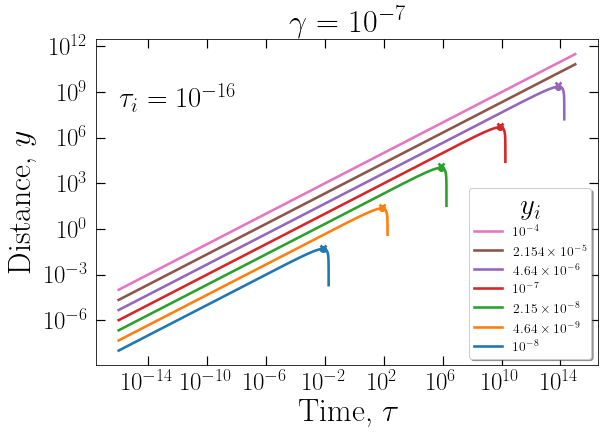

In [50]:
gamma = 1e-7
tau_f = 1e15
yi_arr = np.geomspace(1e-4, 1e-8, 7)


fig, ax = plt.subplots(1, figsize = (9, 6))
plt.rc('lines', linewidth = 2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')

colors = ['C6', 'C5', 'C4', 'C3', 'C2', 'C1', 'C0']


marker_handles = []
for i, (y_i, color) in enumerate(zip(yi_arr, colors)):
    tau_i = 1e-16
    v_i = y_i / (2 * tau_i) 
    y0 = [y_i, v_i]
    tau_arr = np.geomspace(tau_i, tau_f, 100000) 

    
    sol_fdm = solve_ivp(j_fdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-8, atol=1e-8, events=[event_y_max, event_y_min])

    ax.loglog(sol_fdm.t, sol_fdm.y[0], color=color, label=f'FDM $y_i={y_i:.1e}$')

    if len(sol_fdm.t_events[0]) > 0: 
        tauta_numerical = sol_fdm.t_events[0][0]
        yta_numerical = sol_fdm.y_events[0][0][0]
        yta_analytic = r_turnaround_fdm(tauta_numerical, gamma)
        print( "y_i =", '%0.4e'%y_i , ",",  "tau_ta_numerical =", '%0.4e'%tauta_numerical, ",", "yta_numerical =", '%0.4e'%yta_numerical, ",", "yta_analytic =", '%0.4e'%yta_analytic)
            
        yta_numerical_marker = ax.scatter(tauta_numerical, yta_numerical,color=color, zorder=1  )
        yta_analytic_marker = ax.scatter(tauta_numerical, yta_analytic, color=color,  marker='x',  zorder=9)
        if i == 0:
            marker_handles.append((yta_numerical_marker, "Numerical "))
            marker_handles.append((yta_analytic_marker, "Analytic"))

if len(marker_handles) == 2:  
    legend1 = plt.legend(
        handles=[marker_handles[0][0], marker_handles[1][0]],
        labels=[marker_handles[0][1], marker_handles[1][1]],prop={'size':16.2},
        loc=(1.02, 0.58), title=r'$y_\mathrm{ta}$', title_fontsize= 29, fontsize=12)
    ax.add_artist(legend1)


lines = ax.get_lines()
legend2 = plt.legend([lines[i] for i in range(0, len(colors))], [r'$10^{-4}$', r'$2.154\times10^{-5}$', r'$4.64\times10^{-6}$', r'$10^{-7}$',
        r'$2.15\times10^{-8}$', r'$4.64\times10^{-9}$', r'$10^{-8}$'],prop={'size':13.7},
                     loc='lower right', shadow=True, title='$y_{i}$', title_fontsize=29,
    facecolor='white', fontsize=12)

ax.tick_params(axis='x', pad = 6.9)
ax.tick_params(axis='y', pad = 6.9)

plt.text(tau_i, 1e8, r'$\tau_i = 10^{-16}$', fontsize = 29)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau$', fontsize=32)
plt.ylabel('Distance, $y$', fontsize=32, labelpad=9)
#plt.title(r' Dynamics of FDM Shells, $\gamma = 10^{-4}$', fontsize= 28)
plt.title(r'$\gamma = 10^{-7}$', fontsize= 32)

plt.savefig('yta2.pdf', bbox_inches='tight')
plt.show()

y_i = 4.6416e-06 , tau_ta_numerical = 7.2830e+13 , yta_numerical = 2.2598e+09 , yta_analytic = 2.7684e+09
y_i = 1.0000e-06 , tau_ta_numerical = 7.2831e+09 , yta_numerical = 4.8687e+06 , yta_analytic = 5.9644e+06
y_i = 2.1544e-07 , tau_ta_numerical = 7.2832e+05 , yta_numerical = 1.0489e+04 , yta_analytic = 1.2850e+04
y_i = 4.6416e-08 , tau_ta_numerical = 7.2869e+01 , yta_numerical = 2.2606e+01 , yta_analytic = 2.7694e+01
y_i = 1.0000e-08 , tau_ta_numerical = 8.3413e-03 , yta_numerical = 5.3222e-02 , yta_analytic = 6.5273e-02


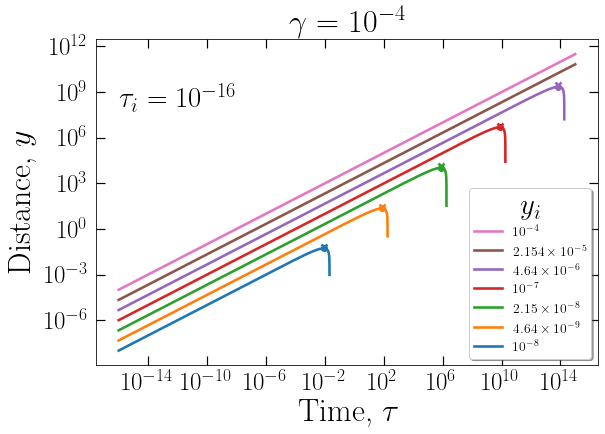

In [52]:
gamma = 1e-4
tau_f = 1e15
yi_arr = np.geomspace(1e-4, 1e-8, 7)


fig, ax = plt.subplots(1, figsize = (9, 6))
plt.rc('lines', linewidth = 2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')

colors = ['C6', 'C5', 'C4', 'C3', 'C2', 'C1', 'C0']


marker_handles = []
for i, (y_i, color) in enumerate(zip(yi_arr, colors)):
    tau_i = 1e-16
    v_i = y_i / (2 * tau_i) 
    y0 = [y_i, v_i]
    tau_arr = np.geomspace(tau_i, tau_f, 100000) 

    
    sol_fdm = solve_ivp(j_fdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-8, atol=1e-8, events=[event_y_max, event_y_min])

    ax.loglog(sol_fdm.t, sol_fdm.y[0], color=color, label=f'FDM $y_i={y_i:.1e}$')

    if len(sol_fdm.t_events[0]) > 0: 
        tauta_numerical = sol_fdm.t_events[0][0]
        yta_numerical = sol_fdm.y_events[0][0][0]
        yta_analytic = r_turnaround_fdm(tauta_numerical, gamma)
        print( "y_i =", '%0.4e'%y_i , ",",  "tau_ta_numerical =", '%0.4e'%tauta_numerical, ",", "yta_numerical =", '%0.4e'%yta_numerical, ",", "yta_analytic =", '%0.4e'%yta_analytic)
            
        yta_numerical_marker = ax.scatter(tauta_numerical, yta_numerical,color=color, zorder=1  )
        yta_analytic_marker = ax.scatter(tauta_numerical, yta_analytic, color=color,  marker='x',  zorder=9)
        if i == 0:
            marker_handles.append((yta_numerical_marker, "Numerical "))
            marker_handles.append((yta_analytic_marker, "Analytic"))

if len(marker_handles) == 2:  
    legend1 = plt.legend(
        handles=[marker_handles[0][0], marker_handles[1][0]],
        labels=[marker_handles[0][1], marker_handles[1][1]],prop={'size':16.2},
        loc=(1.02, 0.58), title=r'$y_\mathrm{ta}$', title_fontsize= 29, fontsize=12)
    ax.add_artist(legend1)


lines = ax.get_lines()
legend2 = plt.legend([lines[i] for i in range(0, len(colors))], [r'$10^{-4}$', r'$2.154\times10^{-5}$', r'$4.64\times10^{-6}$', r'$10^{-7}$',
        r'$2.15\times10^{-8}$', r'$4.64\times10^{-9}$', r'$10^{-8}$'],prop={'size':13.7},
                     loc='lower right', shadow=True, title='$y_{i}$', title_fontsize=29,
    facecolor='white', fontsize=12)

ax.tick_params(axis='x', pad = 6.9)
ax.tick_params(axis='y', pad = 6.9)

plt.text(tau_i, 1e8, r'$\tau_i = 10^{-16}$', fontsize = 29)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau$', fontsize=32)
plt.ylabel('Distance, $y$', fontsize=32, labelpad=9)
#plt.title(r' Dynamics of FDM Shells, $\gamma = 1.0$', fontsize= 28)
plt.title(r'$\gamma = 10^{-4}$', fontsize= 32)
plt.savefig('yta3.pdf', bbox_inches='tight')
plt.show()

y_i = 4.6416e-06 , tau_ta_numerical = 7.2830e+13 , yta_numerical = 2.2598e+09 , yta_analytic = 2.7684e+09
y_i = 1.0000e-06 , tau_ta_numerical = 7.2833e+09 , yta_numerical = 4.8688e+06 , yta_analytic = 5.9645e+06
y_i = 2.1544e-07 , tau_ta_numerical = 7.3432e+05 , yta_numerical = 1.0547e+04 , yta_analytic = 1.2920e+04
y_i = 4.6416e-08 , tau_ta_numerical = 5.0895e+02 , yta_numerical = 8.1842e+01 , yta_analytic = 1.0111e+02
y_i = 1.0000e-08 , tau_ta_numerical = 1.5633e+06 , yta_numerical = 1.7215e+04 , yta_analytic = 2.1382e+04


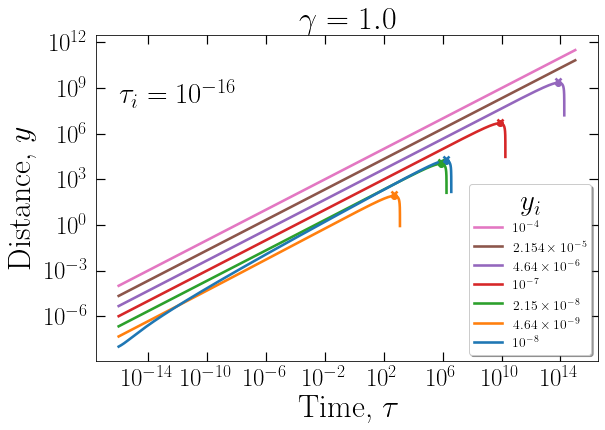

In [53]:
gamma = 1.0
tau_f = 1e15
yi_arr = np.geomspace(1e-4, 1e-8, 7)


fig, ax = plt.subplots(1, figsize = (9, 6))
plt.rc('lines', linewidth = 2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')

colors = ['C6', 'C5', 'C4', 'C3', 'C2', 'C1', 'C0']


marker_handles = []
for i, (y_i, color) in enumerate(zip(yi_arr, colors)):
    tau_i = 1e-16
    v_i = y_i / (2 * tau_i) 
    y0 = [y_i, v_i]
    tau_arr = np.geomspace(tau_i, tau_f, 100000) 

    
    sol_fdm = solve_ivp(j_fdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-8, atol=1e-8, events=[event_y_max, event_y_min])

    ax.loglog(sol_fdm.t, sol_fdm.y[0], color=color, label=f'FDM $y_i={y_i:.1e}$')

    if len(sol_fdm.t_events[0]) > 0: 
        tauta_numerical = sol_fdm.t_events[0][0]
        yta_numerical = sol_fdm.y_events[0][0][0]
        yta_analytic = r_turnaround_fdm(tauta_numerical, gamma)
        print( "y_i =", '%0.4e'%y_i , ",",  "tau_ta_numerical =", '%0.4e'%tauta_numerical, ",", "yta_numerical =", '%0.4e'%yta_numerical, ",", "yta_analytic =", '%0.4e'%yta_analytic)
            
        yta_numerical_marker = ax.scatter(tauta_numerical, yta_numerical,color=color, zorder=1  )
        yta_analytic_marker = ax.scatter(tauta_numerical, yta_analytic, color=color,  marker='x',  zorder=9)
        if i == 0:
            marker_handles.append((yta_numerical_marker, "Numerical "))
            marker_handles.append((yta_analytic_marker, "Analytic"))

if len(marker_handles) == 2:  
    legend1 = plt.legend(
        handles=[marker_handles[0][0], marker_handles[1][0]],
        labels=[marker_handles[0][1], marker_handles[1][1]],prop={'size':16.2},
        loc=(1.02, 0.58), title=r'$y_\mathrm{ta}$', title_fontsize= 29, fontsize=12)
    ax.add_artist(legend1)


lines = ax.get_lines()
legend2 = plt.legend([lines[i] for i in range(0, len(colors))], [r'$10^{-4}$', r'$2.154\times10^{-5}$', r'$4.64\times10^{-6}$', r'$10^{-7}$',
        r'$2.15\times10^{-8}$', r'$4.64\times10^{-9}$', r'$10^{-8}$'],prop={'size':13.7},
                     loc='lower right', shadow=True, title='$y_{i}$', title_fontsize=29,
    facecolor='white', fontsize=12)

ax.tick_params(axis='x', pad = 6.9)
ax.tick_params(axis='y', pad = 6.9)

plt.text(tau_i, 1e8, r'$\tau_i = 10^{-16}$', fontsize = 29)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau$', fontsize=32)
plt.ylabel('Distance, $y$', fontsize=32, labelpad=9)
#plt.title(r' Dynamics of FDM Shells, $\gamma = 1.0$', fontsize= 28)
plt.title(r'$\gamma = 1.0$', fontsize= 32)
plt.savefig('yta4.pdf', bbox_inches='tight')
plt.show()

In [54]:
#So, the previous three plots show that the values of y_ta_numerical
# and y_ta_analytical are not exactly same and roughly share a difference of 20%.
